#### Import Important Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Read the Data

In [3]:
Insurance_Sales=pd.read_excel(r"C:\Users\Akash Jha\OneDrive\Desktop\Education Data Science\Great Learning\Capstone Project\Sales.xlsx",sheet_name='Sales')

In [4]:
Insurance_Sales.head()

CustID  AgentBonus   Age  CustTenure              Channel      Occupation  \
0  7000000        4409  22.0         4.0                Agent        Salaried   
1  7000001        2214  11.0         2.0  Third Party Partner        Salaried   
2  7000002        4273  26.0         4.0                Agent     Free Lancer   
3  7000003        1791  11.0         NaN  Third Party Partner        Salaried   
4  7000004        2955   6.0         NaN                Agent  Small Business   

  EducationField   Gender  ExistingProdType Designation  NumberOfPolicy  \
0       Graduate   Female                 3     Manager             2.0   
1       Graduate     Male                 4     Manager             4.0   
2  Post Graduate     Male                 4         Exe             3.0   
3       Graduate  Fe male                 3   Executive             3.0   
4             UG     Male                 3   Executive             4.0   

  MaritalStatus  MonthlyIncome  Complaint  ExistingPolicyTenure  SumAssured  \
0        Single        20993.0          1                   2.0    806761.0   
1      Divorced        20130.0          0                   3.0    294502.0   
2     Unmarried        17090.0          1                   2.0         NaN   
3      Divorced        17909.0          1                   2.0    268635.0   
4      Divorced        18468.0          0                   4.0    366405.0   

    Zone PaymentMethod  LastMonthCalls  CustCareScore  
0  North   Half Yearly               5            2.0  
1  North        Yearly               7            3.0  
2  North        Yearly               0            3.0  
3   West   Half Yearly               0            5.0  
4   West   Half Yearly               2            5.0

In [5]:
Insurance_Sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4520 entries, 0 to 4519
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CustID                4520 non-null   int64  
 1   AgentBonus            4520 non-null   int64  
 2   Age                   4251 non-null   float64
 3   CustTenure            4294 non-null   float64
 4   Channel               4520 non-null   object 
 5   Occupation            4520 non-null   object 
 6   EducationField        4520 non-null   object 
 7   Gender                4520 non-null   object 
 8   ExistingProdType      4520 non-null   int64  
 9   Designation           4520 non-null   object 
 10  NumberOfPolicy        4475 non-null   float64
 11  MaritalStatus         4520 non-null   object 
 12  MonthlyIncome         4284 non-null   float64
 13  Complaint             4520 non-null   int64  
 14  ExistingPolicyTenure  4336 non-null   float64
 15  SumAssured           

In [6]:
# Drop CustID as it will not give any inference
Insurance_Sales.drop('CustID',axis=1,inplace=True)

#### Check Unique Values

In [7]:
Categorical_columns=['Channel','Occupation','EducationField','Gender','Designation','MaritalStatus','Zone','PaymentMethod']
# Print Frequency of Variables
for col in Categorical_columns:
    print('\nFrequency of Categories for variable %s'%col)
    print(Insurance_Sales[col].value_counts())


Frequency of Categories for variable Channel
Agent                  3194
Third Party Partner     858
Online                  468
Name: Channel, dtype: int64

Frequency of Categories for variable Occupation
Salaried           2192
Small Business     1918
Large Business      255
Laarge Business     153
Free Lancer           2
Name: Occupation, dtype: int64

Frequency of Categories for variable EducationField
Graduate          1870
Under Graduate    1190
Diploma            496
Engineer           408
Post Graduate      252
UG                 230
MBA                 74
Name: EducationField, dtype: int64

Frequency of Categories for variable Gender
Male       2688
Female     1507
Fe male     325
Name: Gender, dtype: int64

Frequency of Categories for variable Designation
Manager           1620
Executive         1535
Senior Manager     676
AVP                336
VP                 226
Exe                127
Name: Designation, dtype: int64

Frequency of Categories for variable MaritalStatus
M

##### Clean Messy Names 

In [8]:
# Clean Occupation Column
Insurance_Sales.Occupation.replace(to_replace='Laarge Business',value='Large Business',inplace=True)

In [9]:
# Clean EducationField Column
Insurance_Sales.EducationField.replace(to_replace='UG',value='Under Graduate',inplace=True)

In [10]:
# Clean Gender Column
Insurance_Sales.Gender.replace(to_replace='Fe male',value='Female',inplace=True)

In [11]:
# Clean Designation Column
Insurance_Sales.Designation.replace(to_replace='Exe',value='Executive',inplace=True)

In [12]:
# Clean MaritalStatus column
Insurance_Sales['MaritalStatus']=Insurance_Sales['MaritalStatus'].apply(lambda x: x.replace('Unmarried','Single'))

#### Check data Ratio

In [13]:
Categorical_columns=['Channel','Occupation','EducationField','Gender','Designation','MaritalStatus','Zone','PaymentMethod']
# Print Frequency of Variables
for col in Categorical_columns:
    print('\nFrequency of Categories for variable %s'%col)
    print(Insurance_Sales[col].value_counts())


Frequency of Categories for variable Channel
Agent                  3194
Third Party Partner     858
Online                  468
Name: Channel, dtype: int64

Frequency of Categories for variable Occupation
Salaried          2192
Small Business    1918
Large Business     408
Free Lancer          2
Name: Occupation, dtype: int64

Frequency of Categories for variable EducationField
Graduate          1870
Under Graduate    1420
Diploma            496
Engineer           408
Post Graduate      252
MBA                 74
Name: EducationField, dtype: int64

Frequency of Categories for variable Gender
Male      2688
Female    1832
Name: Gender, dtype: int64

Frequency of Categories for variable Designation
Executive         1662
Manager           1620
Senior Manager     676
AVP                336
VP                 226
Name: Designation, dtype: int64

Frequency of Categories for variable MaritalStatus
Married     2268
Single      1448
Divorced     804
Name: MaritalStatus, dtype: int64

Frequen

In [14]:
Insurance_Sales.shape

(4520, 19)

#### Examine Missing Values

In [15]:
# Examine Total Count Missing Values
Missing_values=Insurance_Sales.isna().sum()
Missing_values[Missing_values.values>0].sort_values(ascending=False)

Age                     269
MonthlyIncome           236
CustTenure              226
ExistingPolicyTenure    184
SumAssured              154
CustCareScore            52
NumberOfPolicy           45
dtype: int64

In [16]:
# Examine Percentage of Missing Data
round(Missing_values[Missing_values.values>0].sort_values(ascending=False)/len(Insurance_Sales.index),2) * 100

Age                     6.0
MonthlyIncome           5.0
CustTenure              5.0
ExistingPolicyTenure    4.0
SumAssured              3.0
CustCareScore           1.0
NumberOfPolicy          1.0
dtype: float64

#### Max missing value % in Data is 5 to 6 % which is very less but as dataset is not significantly large , we will not drop any variable and will treat the missing Values

In [17]:
Insurance_Sales.describe().T

count           mean            std       min  \
AgentBonus            4520.0    4077.838274    1403.321711    1605.0   
Age                   4251.0      14.494707       9.037629       2.0   
CustTenure            4294.0      14.469027       8.963671       2.0   
ExistingProdType      4520.0       3.688938       1.015769       1.0   
NumberOfPolicy        4475.0       3.565363       1.455926       1.0   
MonthlyIncome         4284.0   22890.309991    4885.600757   16009.0   
Complaint             4520.0       0.287168       0.452491       0.0   
ExistingPolicyTenure  4336.0       4.130074       3.346386       1.0   
SumAssured            4366.0  619999.699267  246234.822140  168536.0   
LastMonthCalls        4520.0       4.626991       3.620132       0.0   
CustCareScore         4468.0       3.067592       1.382968       1.0   

                            25%       50%        75%        max  
AgentBonus              3027.75    3911.5    4867.25     9608.0  
Age                        7.00      13.0      20.00       58.0  
CustTenure                 7.00      13.0      20.00       57.0  
ExistingProdType           3.00       4.0       4.00        6.0  
NumberOfPolicy             2.00       4.0       5.00        6.0  
MonthlyIncome          19683.50   21606.0   24725.00    38456.0  
Complaint                  0.00       0.0       1.00        1.0  
ExistingPolicyTenure       2.00       3.0       6.00       25.0  
SumAssured            439443.25  578976.5  758236.00  1838496.0  
LastMonthCalls             2.00       3.0       8.00       18.0  
CustCareScore              2.00       3.0       4.00        5.0

In [18]:
Insurance_Sales.Complaint.value_counts()

0    3222
1    1298
Name: Complaint, dtype: int64

In [19]:
# Lets find Agent Bonus on Different Percentile
print('0.5% Agents have Bonus lower than {0: .2f}'.format(np.percentile(Insurance_Sales['AgentBonus'],0.5)))
print('1% Agents have Bonus lower than {0: .2f}'.format(np.percentile(Insurance_Sales['AgentBonus'],1)))
print('10% Agents have Bonus lower than{0: .2f}'.format(np.percentile(Insurance_Sales['AgentBonus'],10)))
print('90% Agents have Bonus lower than{0: .2f}'.format(np.percentile(Insurance_Sales['AgentBonus'],90)))
print('95% Agents have Bonus lower than{0: .2f}'.format(np.percentile(Insurance_Sales['AgentBonus'],95)))
print('99% Agents have Bonus lower than{0: .2f}'.format(np.percentile(Insurance_Sales['AgentBonus'],99)))
print('99.5% Agents have Bonus lower than{0: .2f}'.format(np.percentile(Insurance_Sales['AgentBonus'],99.5)))

0.5% Agents have Bonus lower than  1755.19
1% Agents have Bonus lower than  1876.38
10% Agents have Bonus lower than 2418.00
90% Agents have Bonus lower than 5917.10
95% Agents have Bonus lower than 6755.50
99% Agents have Bonus lower than 8234.44
99.5% Agents have Bonus lower than 8757.22


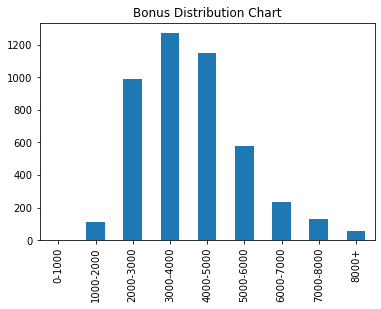

In [20]:
## Let's create a range variable to understand how many records we have in different slabs
Bonus= pd.cut(Insurance_Sales['AgentBonus'],
             bins=[0,1000,2000,3000,4000,5000,6000,7000,8000,Insurance_Sales['AgentBonus'].max()],
             labels=['0-1000','1000-2000','2000-3000','3000-4000','4000-5000','5000-6000','6000-7000','7000-8000','8000+'])
Insurance_Sales['Bonus']=Bonus
fig_1=Insurance_Sales['Bonus'].value_counts().sort_index().plot(kind='bar')
plt.title('Bonus Distribution Chart')
plt.show()


#### We can use this as class distribution or Classifier problem , if business wants to know only range of Agent Bonus we can used this, but as we are working on regression model we will drop this variable Bonus

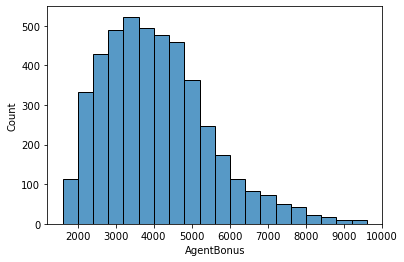

In [21]:
sns.histplot(Insurance_Sales['AgentBonus'],bins=20);

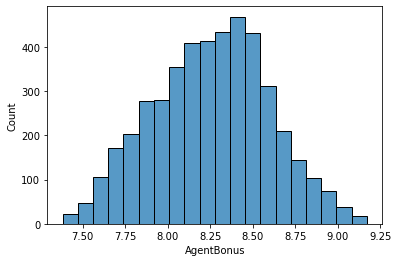

In [22]:
sns.histplot(np.log(Insurance_Sales['AgentBonus']),bins=20);

#### We can see after log transform distribution symmetry is much better 

In [23]:
# Drop Bonus Variable
Insurance_Sales.drop(['Bonus'],axis=1,inplace=True)

In [24]:
# Examine Percentage of Missing Data
round(Missing_values[Missing_values.values>0].sort_values(ascending=False)/len(Insurance_Sales.index),2) * 100

Age                     6.0
MonthlyIncome           5.0
CustTenure              5.0
ExistingPolicyTenure    4.0
SumAssured              3.0
CustCareScore           1.0
NumberOfPolicy          1.0
dtype: float64

In [25]:
# Lets do Encoding on data
# Copy main Data
Agent_Bonus=Insurance_Sales.copy()

In [26]:
# Imputation of Missing Values
Categorial_columns=[]
Numeric_columns=[]
for c in Agent_Bonus.columns:
    if Agent_Bonus[c].map(type).eq(str).any(): # Check for string values in column
        Categorial_columns.append(c)
    else:
        Numeric_columns.append(c)
    
# create two dataframe, one for each datatype and concat:
Agent_numeric= Agent_Bonus[Numeric_columns]
Agent_categoric=pd.DataFrame(Agent_Bonus[Categorial_columns])

from sklearn.impute import SimpleImputer
imp=SimpleImputer(missing_values=np.nan,strategy='median')
Agent_numeric=pd.DataFrame(imp.fit_transform(Agent_numeric),columns=Agent_numeric.columns,index=Agent_numeric.index)

#join the two masked dataframes back together
Agent_Sales=pd.concat([Agent_numeric,Agent_categoric],axis=1)


In [27]:
# Imputation of Missing Values
Categorial_columns=[]
Numeric_columns=[]
for c in Agent_Bonus.columns:
    if Agent_Bonus[c].map(type).eq(str).any(): # Check for string values in column
        Categorial_columns.append(c)
    else:
        Numeric_columns.append(c)
    
# create two dataframe, one for each datatype and concat:
Agent_numeric= Agent_Bonus[Numeric_columns]
Agent_categoric=pd.DataFrame(Agent_Bonus[Categorial_columns])

from sklearn.impute import SimpleImputer
imp=SimpleImputer(missing_values=np.nan,strategy='median')
Agent_numeric=pd.DataFrame(imp.fit_transform(Agent_numeric),columns=Agent_numeric.columns,index=Agent_numeric.index)

#join the two masked dataframes back together
Agent=pd.concat([Agent_numeric,Agent_categoric],axis=1)

##### We can see there are multiple outliers

##### EDA Starts here 
### Univariate Analysis for Numerical Variables

In [28]:
Numeric_columns

['AgentBonus',
 'Age',
 'CustTenure',
 'ExistingProdType',
 'NumberOfPolicy',
 'MonthlyIncome',
 'Complaint',
 'ExistingPolicyTenure',
 'SumAssured',
 'LastMonthCalls',
 'CustCareScore']

In [29]:
# Let's construct a function that shows the summary and density distribution of a numerical attribute:
def summary(x):
    x_min=Agent[x].min()
    x_max=Agent[x].max()
    Q1=Agent[x].quantile(0.25)
    Q2=Agent[x].quantile(0.50)
    Q3=Agent[x].quantile(0.75)
    print(f'5 Point Summary of {x.capitalize()} Attribute:\n'
         f'{x.capitalize()}(min) : {x_min}\n'
         f'Q1              : {Q1}\n'
         f'Q2(median)      : {Q2}\n'
         f'Q3              : {Q3}\n'
         f'{x.capitalize()}(max) : {x_max}')
    
    fig=plt.figure(figsize=(10,5))
    fig.set_canvas(plt.gcf().canvas)
    plt.subplots_adjust(hspace = 0.6)
    sns.set_palette('pastel')
    
    plt.subplot(221)
    ax1=sns.distplot(x=Agent[x],color='r')
    plt.title(f'{x.capitalize()} Density Distribution')
    
    plt.subplot(222)
    ax2=sns.violinplot(x=Agent[x],palette='Accent',split=True)
    plt.title(f'{x.capitalize()} Violin Plot')
    
    plt.subplot(223)
    ax3=sns.boxplot(x=Agent[x],palette='cool',width=0.7,linewidth=0.6)
    plt.title(f'{x.capitalize()} Boxplot')
    
    plt.subplot(224)
    ax4=sns.kdeplot(x=Agent[x],cumulative=True)
    plt.title(f'{x.capitalize()} Cumulative Density Distribution')
    
    plt.show()

5 Point Summary of Age Attribute:
Age(min) : 2.0
Q1              : 8.0
Q2(median)      : 13.0
Q3              : 19.0
Age(max) : 58.0


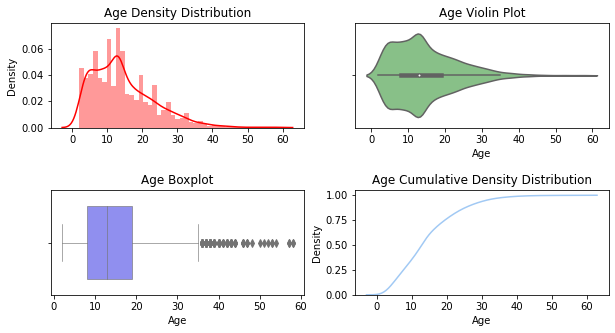

In [30]:
summary('Age')

In [31]:
Agent.describe(include='all')['Age'].T

count     4520.000000
unique            NaN
top               NaN
freq              NaN
mean        14.405752
std          8.771646
min          2.000000
25%          8.000000
50%         13.000000
75%         19.000000
max         58.000000
Name: Age, dtype: float64

5 Point Summary of Custtenure Attribute:
Custtenure(min) : 2.0
Q1              : 8.0
Q2(median)      : 13.0
Q3              : 19.0
Custtenure(max) : 57.0


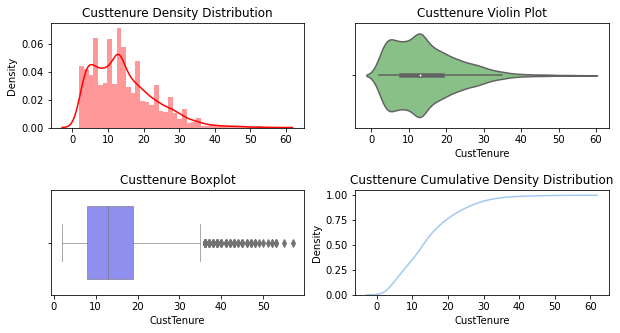

In [32]:
summary('CustTenure')

In [33]:
Agent.describe(include='all')['CustTenure']

count     4520.000000
unique            NaN
top               NaN
freq              NaN
mean        14.395575
std          8.742521
min          2.000000
25%          8.000000
50%         13.000000
75%         19.000000
max         57.000000
Name: CustTenure, dtype: float64

5 Point Summary of Monthlyincome Attribute:
Monthlyincome(min) : 16009.0
Q1              : 19858.0
Q2(median)      : 21606.0
Q3              : 24531.75
Monthlyincome(max) : 38456.0


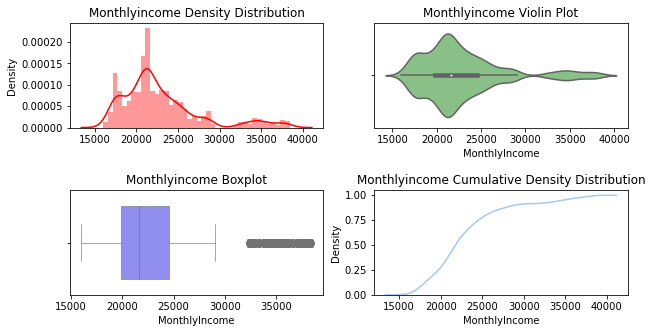

In [34]:
summary('MonthlyIncome')

In [35]:
Agent.describe(include='all')['MonthlyIncome']

count      4520.000000
unique             NaN
top                NaN
freq               NaN
mean      22823.253097
std        4764.892420
min       16009.000000
25%       19858.000000
50%       21606.000000
75%       24531.750000
max       38456.000000
Name: MonthlyIncome, dtype: float64

5 Point Summary of Sumassured Attribute:
Sumassured(min) : 168536.0
Q1              : 444476.25
Q2(median)      : 578976.5
Q3              : 750010.5
Sumassured(max) : 1838496.0


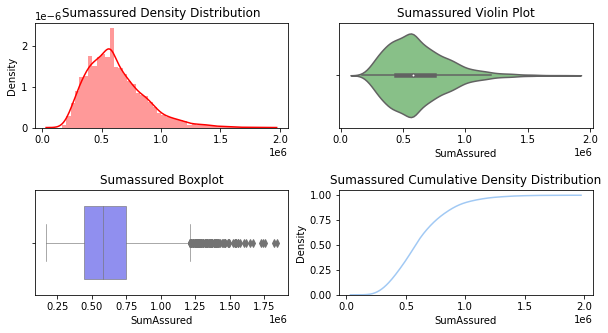

In [36]:
summary('SumAssured')

In [37]:
# Who has the highest suminsured and what bonus agent getting?
Agent[Agent['SumAssured']==Agent.SumAssured.max()]

AgentBonus  Age  CustTenure  ExistingProdType  NumberOfPolicy  \
2825      9192.0  9.0        55.0               6.0             3.0   

      MonthlyIncome  Complaint  ExistingPolicyTenure  SumAssured  \
2825        38302.0        0.0                   2.0   1838496.0   

      LastMonthCalls  CustCareScore Channel      Occupation EducationField  \
2825            10.0            3.0   Agent  Small Business        Diploma   

      Gender Designation MaritalStatus  Zone PaymentMethod  
2825  Female          VP      Divorced  West        Yearly

5 Point Summary of Lastmonthcalls Attribute:
Lastmonthcalls(min) : 0.0
Q1              : 2.0
Q2(median)      : 3.0
Q3              : 8.0
Lastmonthcalls(max) : 18.0


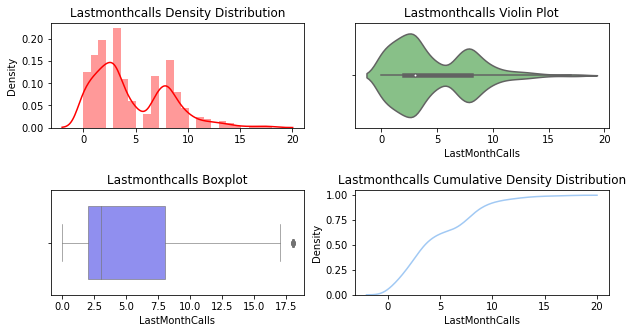

In [38]:
summary('LastMonthCalls')

5 Point Summary of Existingpolicytenure Attribute:
Existingpolicytenure(min) : 1.0
Q1              : 2.0
Q2(median)      : 3.0
Q3              : 5.0
Existingpolicytenure(max) : 25.0


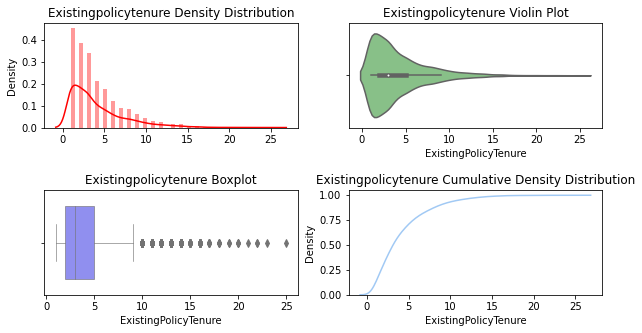

In [39]:
summary('ExistingPolicyTenure')

In [40]:
Agent_Sales.describe(include='all')['ExistingPolicyTenure']

count     4520.000000
unique            NaN
top               NaN
freq              NaN
mean         4.084071
std          3.285152
min          1.000000
25%          2.000000
50%          3.000000
75%          5.000000
max         25.000000
Name: ExistingPolicyTenure, dtype: float64

In [41]:
Categorical_columns

['Channel',
 'Occupation',
 'EducationField',
 'Gender',
 'Designation',
 'MaritalStatus',
 'Zone',
 'PaymentMethod']

In [42]:
# Categorical Variable Counts
Gender_counts={'Female':1832,'Male':2688}
Paymethod_counts={'Half Yearly':2656,'Yearly': 1434,'Monthly': 354,'Quarterly':76 }
Zone_counts={'West': 2566,'North': 1884,'East': 64,'South': 6}
Martial_counts={'Married':2268, 'Single':1448 ,'Divorced':804}
Designation_counts={'Executive':1662,'Manager':1620,'Senior Manager':676,'AVP':336,'VP':226}
Education_counts={'Graduate':1870,'Under Graduate':1420,'Diploma':496,'Engineer':408,'Post Graduate':252,'MBA':74}
Occupation_counts={'Salaried':2192,'Small Business':1918,'Large Business':408,'Free Lancer':2}
Channel_counts={'Agent':3194,'Third Party Partner':858,'Online':468}


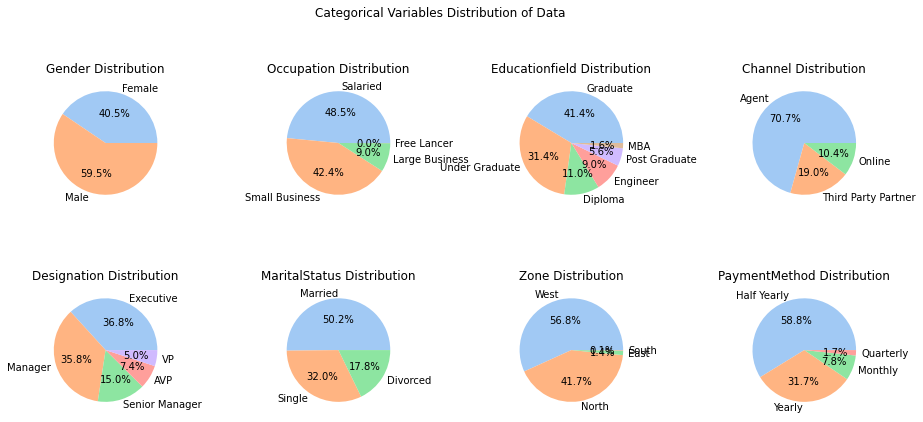

In [43]:
fig=plt.figure(figsize=(16,10))
plt.subplots_adjust(hspace=0.6)
sns.set_palette('pastel')

plt.subplot(341)
px1=plt.pie(Gender_counts.values(),labels=Gender_counts.keys(),autopct='%1.1f%%')
plt.title('Gender Distribution')

plt.subplot(342)
px2=plt.pie(Occupation_counts.values(),labels=Occupation_counts.keys(),autopct='%1.1f%%')
plt.title('Occupation Distribution')

plt.subplot(343)
px3=plt.pie(Education_counts.values(),labels=Education_counts.keys(),autopct='%1.1f%%')
plt.title('Educationfield Distribution')

plt.subplot(344)
px4=plt.pie(Channel_counts.values(),labels=Channel_counts.keys(),autopct='%1.1f%%')
plt.title('Channel Distribution')

plt.subplot(345)
px5=plt.pie(Designation_counts.values(),labels=Designation_counts.keys(),autopct='%1.1f%%')
plt.title('Designation Distribution')

plt.subplot(346)
px6=plt.pie(Martial_counts.values(),labels=Martial_counts.keys(),autopct='%1.1f%%')
plt.title('MaritalStatus Distribution')

plt.subplot(347)
px7=plt.pie(Zone_counts.values(),labels=Zone_counts.keys(),autopct='%1.1f%%')
plt.title('Zone Distribution')

plt.subplot(348)
px8=plt.pie(Paymethod_counts.values(),labels=Paymethod_counts.keys(),autopct='%1.1f%%')
plt.title('PaymentMethod Distribution')

plt.suptitle('Categorical Variables Distribution of Data')
plt.show()


#### Bivariate Analysis Analysis for Numerical Variables

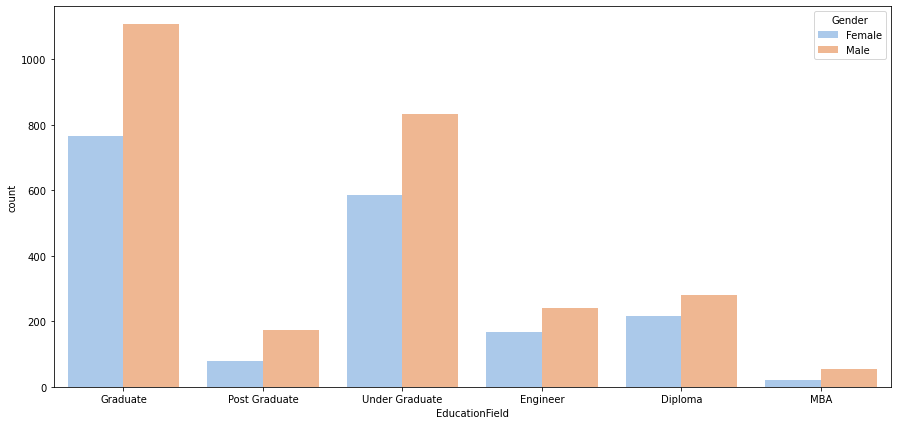

In [44]:
# Comparing two Variables
plt.figure(figsize=(15,7))
sns.countplot(x=Agent_Bonus.EducationField,hue=Agent_Bonus.Gender);

In [45]:
# Are average sumassured for high designation is significantly higher than lower designation?
round(Agent_Bonus['SumAssured'].groupby(Agent_Bonus['Designation']).mean().sort_values(ascending=False),0)

Designation
VP                935026.0
AVP               811869.0
Senior Manager    694541.0
Manager           592457.0
Executive         526430.0
Name: SumAssured, dtype: float64

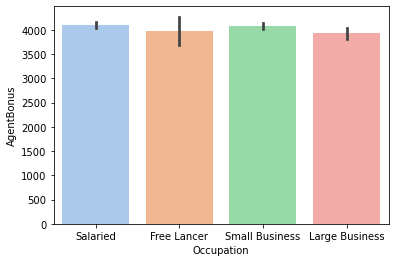

In [46]:
# Agent Bonus does depend on Occupation?
sns.barplot(x=Agent_Bonus.Occupation,y=Agent_Bonus.AgentBonus);
# We can conclude there is no much difference , so this comparison is irrlevant

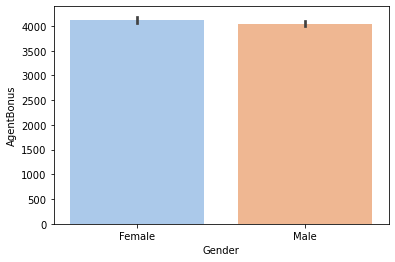

In [47]:
# Agent Bonus does show any pattern on Occupation?
sns.barplot(x=Agent_Bonus.Gender,y=Agent_Bonus.AgentBonus);
# Very Slight increase in female customer compared to male customers

In [48]:
# Does No of Policy relate with designation is significantly higher than lower designation?
Agent_Bonus['NumberOfPolicy'].groupby(Agent_Bonus['Designation']).count().sort_values(ascending=False)

Designation
Executive         1662
Manager           1620
Senior Manager     674
AVP                293
VP                 226
Name: NumberOfPolicy, dtype: int64

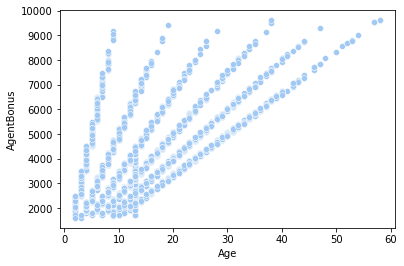

In [49]:
# Any Realtion Between Age and Agent Bonus?
sns.scatterplot(x=Agent_Sales.Age,y=Agent_Sales.AgentBonus);

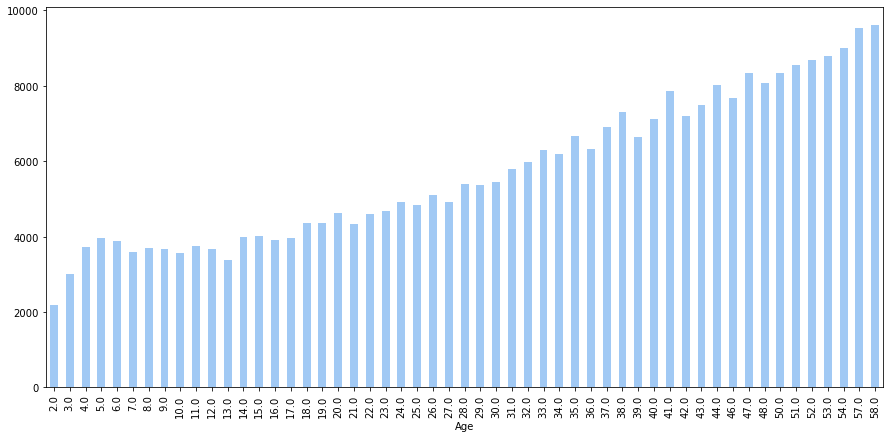

In [50]:
# Which Age has Highest Average Agent Bonus?
plt.figure(figsize=(15,7))
round(Agent_Sales['AgentBonus'].groupby(Agent_Sales['Age']).mean(),0).plot(kind='bar');

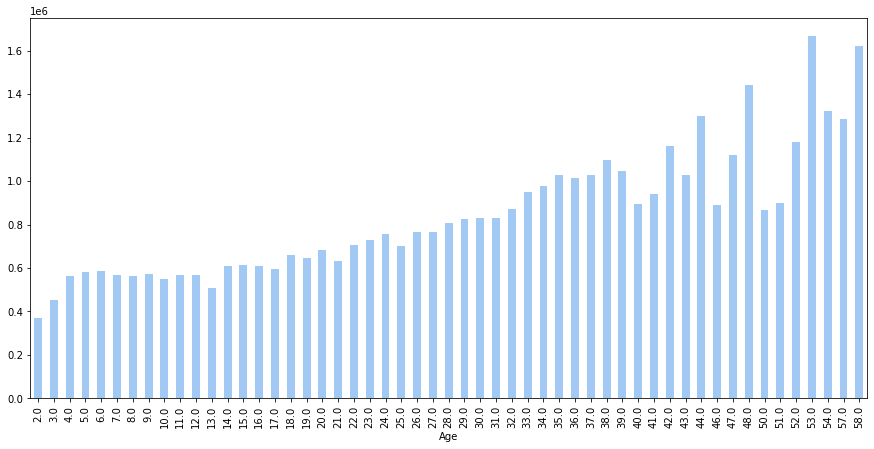

In [51]:
# Which Age has Highest Average Agent Bonus?
plt.figure(figsize=(15,7))
round(Agent_Sales['SumAssured'].groupby(Agent_Sales['Age']).mean(),0).plot(kind='bar');

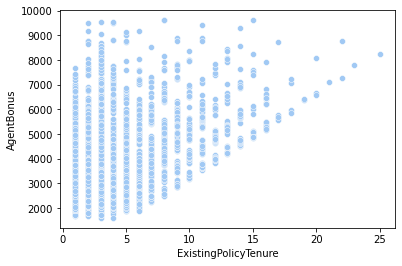

In [52]:
# Any Realtion Between ExistingPolicyTenure and Agent Bonus?
sns.scatterplot(x=Agent_Sales.ExistingPolicyTenure,y=Agent_Sales.AgentBonus);
# No relation between them

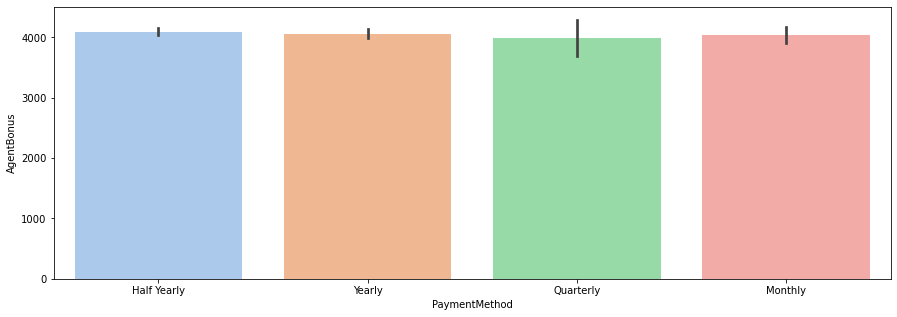

In [53]:
# effective of payment method on Agent Bonus
plt.figure(figsize=(15,5))
sns.barplot(x=Agent_Bonus.PaymentMethod,y=Agent_Bonus.AgentBonus);
# Insignificant impact

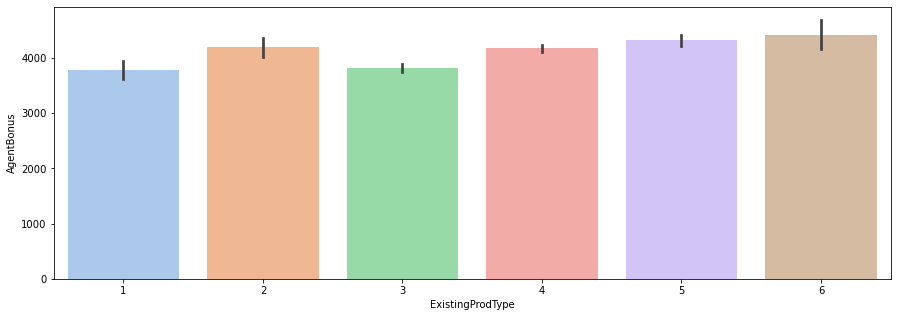

In [54]:
plt.figure(figsize=(15,5))
sns.barplot(x=Agent_Bonus.ExistingProdType,y=Agent_Bonus.AgentBonus);
# Product type 6 has highest bonus and 3 has lowest

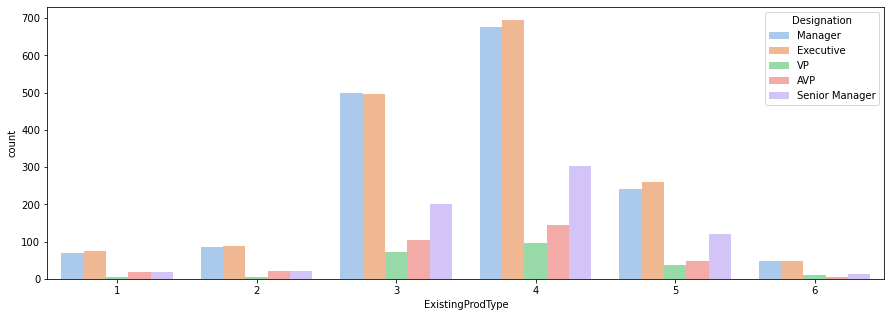

In [55]:
plt.figure(figsize=(15,5))
sns.countplot(x=Agent_Bonus.ExistingProdType,hue=Agent_Bonus.Designation);

In [56]:
# Map categorical variables
Agent_Sales['Gender']=Agent_Sales.Gender.map({'Female':1,'Male':0})
Agent_Sales['Channel']=Agent_Sales.Channel.map({'Agent':1,'Third Party Partner':2,'Online':3})
Agent_Sales['Designation']=Agent_Sales.Designation.map({'Executive':1,'Manager':2,'Senior Manager':3,'AVP':4,'VP':5})
Agent_Sales['MaritalStatus']=Agent_Sales.MaritalStatus.map({'Married':1, 'Single':2 ,'Divorced':3})
Agent_Sales['Zone']=Agent_Sales.Zone.map({'West': 4,'North': 3,'East': 2,'South': 1})
Agent_Sales['PaymentMethod']=Agent_Sales.PaymentMethod.map({'Half Yearly':2,'Yearly': 4,'Monthly':1,'Quarterly':3 })
Agent_Sales['Occupation']=Agent_Sales.Occupation.map({'Salaried':4,'Small Business':3,'Large Business':2,'Free Lancer':1})
Agent_Sales['EducationField']=Agent_Sales.EducationField.map({'Graduate':3,'Under Graduate':2,'Diploma':1,'Engineer':4,'Post Graduate':5,'MBA':6})

In [57]:
# Change Data types of Object columns to category for Pairplot
for x in [Categorial_columns]:
    Agent_Sales[x]=Agent_Sales[x].astype('category')
    
Agent_Sales.dtypes

AgentBonus               float64
Age                      float64
CustTenure               float64
ExistingProdType         float64
NumberOfPolicy           float64
MonthlyIncome            float64
Complaint                float64
ExistingPolicyTenure     float64
SumAssured               float64
LastMonthCalls           float64
CustCareScore            float64
Channel                 category
Occupation              category
EducationField          category
Gender                  category
Designation             category
MaritalStatus           category
Zone                    category
PaymentMethod           category
dtype: object

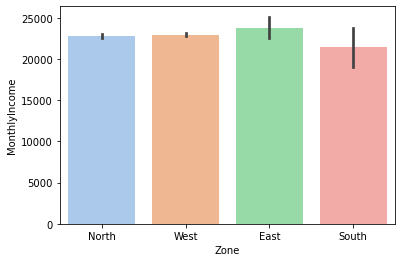

In [58]:
sns.barplot(x=Agent_Bonus.Zone,y=Agent_Bonus.MonthlyIncome);

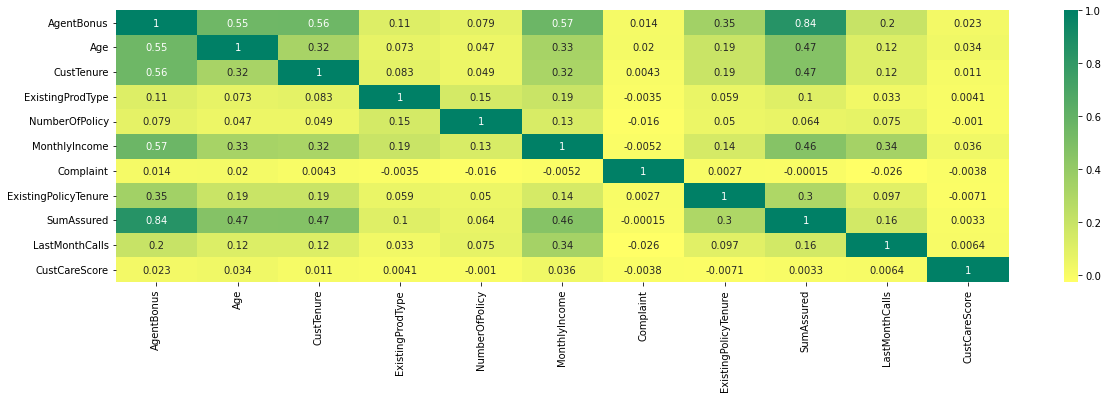

In [59]:
# Check Heatmap for correlation
plt.figure(figsize=(20,5))
sns.heatmap(Agent_Sales.corr(),cmap='summer_r',annot=True)
plt.show()

In [60]:
# Change data type of CustCarescore as it is rating & discrete variable not Continuous variable
Agent_Sales['CustCareScore']=Agent_Sales['CustCareScore'].astype('category')

In [61]:
# Change data type of Product type as it is category & discrete variable not Continuous variable
Agent_Sales['ExistingProdType']=Agent_Sales['ExistingProdType'].astype('category')

In [62]:
# Imputation of Missing Values
Categorial_columns=[]
Numeric_columns=[]
for c in Agent_Bonus.columns:
    if Agent_Bonus[c].map(type).eq(str).any(): # Check for string values in column
        Categorial_columns.append(c)
    else:
        Numeric_columns.append(c)
    
# create two dataframe, one for each datatype and concat:
Agent_numeric= Agent_Bonus[Numeric_columns]
Agent_categoric=pd.DataFrame(Agent_Bonus[Categorial_columns])

from sklearn.impute import SimpleImputer
imp=SimpleImputer(missing_values=np.nan,strategy='median')
Agent_numeric=pd.DataFrame(imp.fit_transform(Agent_numeric),columns=Agent_numeric.columns,index=Agent_numeric.index)

#join the two masked dataframes back together
Agent_Unscaling=pd.concat([Agent_numeric,Agent_categoric],axis=1)

In [63]:
cont=Agent_Unscaling.dtypes[(Agent_Unscaling.dtypes!='object')].index

In [64]:
cont

Index(['AgentBonus', 'Age', 'CustTenure', 'ExistingProdType', 'NumberOfPolicy',
       'MonthlyIncome', 'Complaint', 'ExistingPolicyTenure', 'SumAssured',
       'LastMonthCalls', 'CustCareScore'],
      dtype='object')

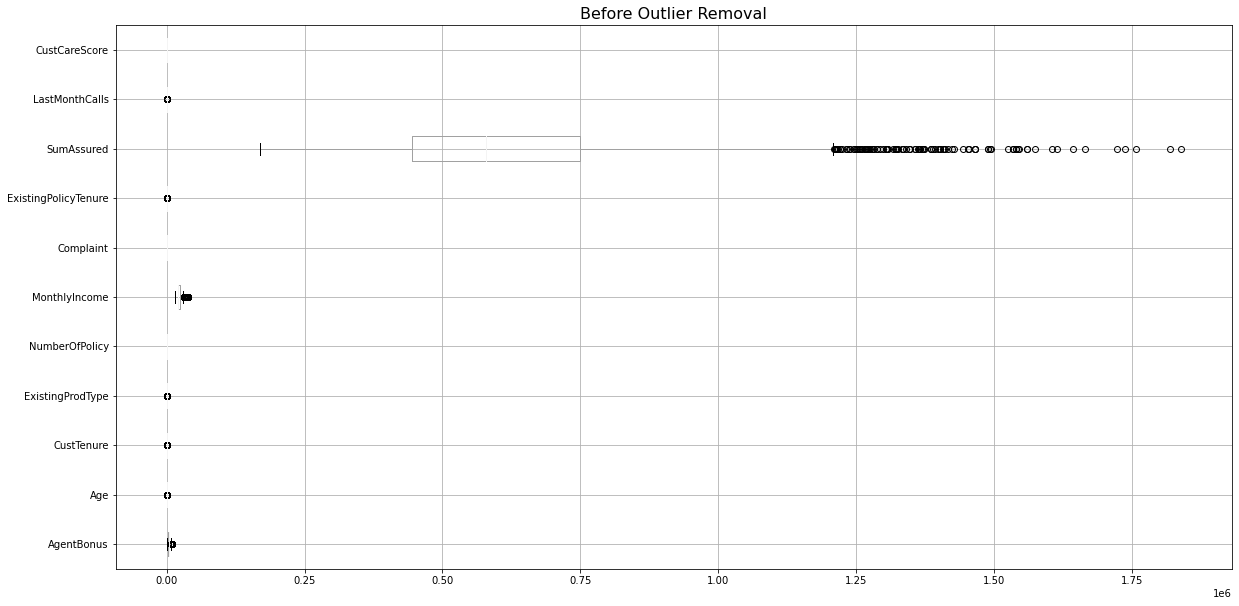

In [65]:
plt.figure(figsize=(20,10))
Agent_Unscaling[cont].boxplot(vert=0)
plt.title('Before Outlier Removal',fontsize=16)
plt.show()

In [66]:
# Treat Outliers
def Remove_outliers(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1 - 1.5*IQR
    upper_range= Q3 + 1.5*IQR
    return lower_range,upper_range

In [67]:
for column in Agent_Unscaling[cont].columns:
    lr,ur=Remove_outliers(Agent_Unscaling[column])
    Agent_Unscaling[column]=np.where(Agent_Unscaling[column]>ur,ur,Agent_Unscaling[column])
    Agent_Unscaling[column]=np.where(Agent_Unscaling[column]<lr,lr,Agent_Unscaling[column])

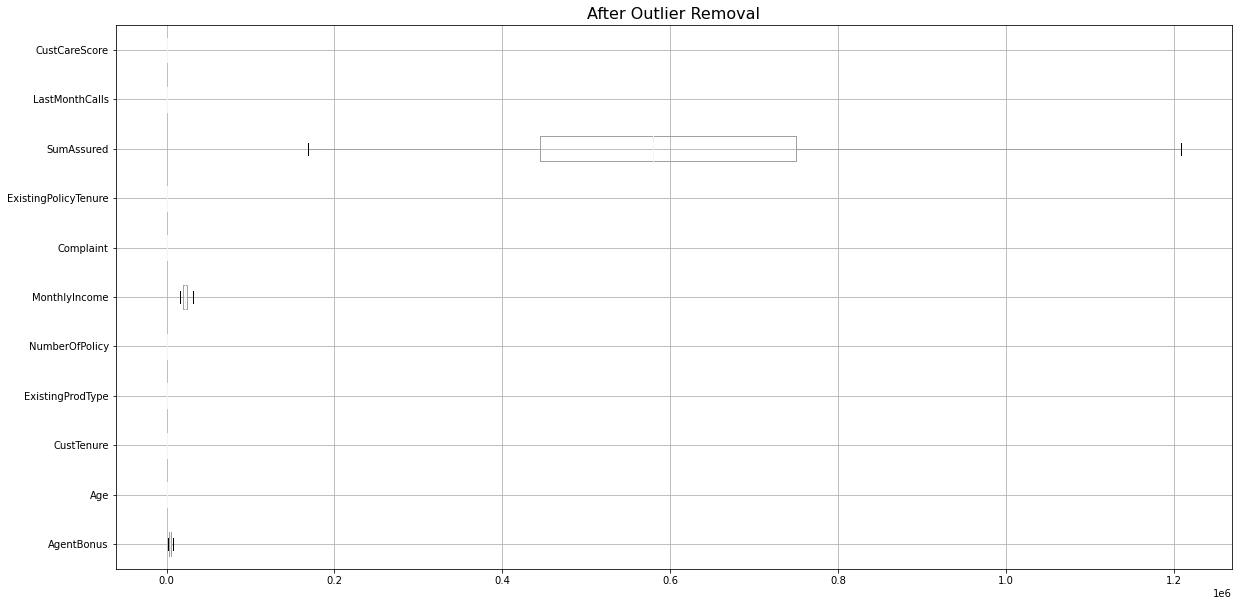

In [68]:
plt.figure(figsize=(20,10))
Agent_Unscaling[cont].boxplot(vert=0)
plt.title('After Outlier Removal',fontsize=16)
plt.show()

#### Import Sklearn

In [69]:
# Adding dummy variables for rest of the categorical variables
Agent_Unscaling=pd.get_dummies(Agent_Unscaling,drop_first=True)

In [70]:
Agent_Unscaling=Agent_Unscaling.reset_index()

In [71]:
Agent_Unscaling

index  AgentBonus   Age  CustTenure  ExistingProdType  NumberOfPolicy  \
0         0      4409.0  22.0         4.0               3.0             2.0   
1         1      2214.0  11.0         2.0               4.0             4.0   
2         2      4273.0  26.0         4.0               4.0             3.0   
3         3      1791.0  11.0        13.0               3.0             3.0   
4         4      2955.0   6.0        13.0               3.0             4.0   
...     ...         ...   ...         ...               ...             ...   
4515   4515      3953.0   4.0         8.0               4.0             2.0   
4516   4516      2939.0   9.0         9.0               2.0             2.0   
4517   4517      3792.0  23.0        23.0               5.0             5.0   
4518   4518      4816.0  10.0        10.0               4.0             2.0   
4519   4519      4764.0  14.0        10.0               5.0             2.0   

      MonthlyIncome  Complaint  ExistingPolicyTenure  SumAssured  ...  \
0           20993.0        1.0                   2.0    806761.0  ...   
1           20130.0        0.0                   3.0    294502.0  ...   
2           17090.0        1.0                   2.0    578976.5  ...   
3           17909.0        1.0                   2.0    268635.0  ...   
4           18468.0        0.0                   4.0    366405.0  ...   
...             ...        ...                   ...         ...  ...   
4515        26355.0        0.0                   2.0    636473.0  ...   
4516        20991.0        0.0                   3.0    296813.0  ...   
4517        21606.0        0.0                   2.0    667371.0  ...   
4518        20068.0        0.0                   6.0    943999.0  ...   
4519        23820.0        0.0                   3.0    700308.0  ...   

      Designation_Senior Manager  Designation_VP  MaritalStatus_Married  \
0                              0               0                      0   
1                              0               0                      0   
2                              0               0                      0   
3                              0               0                      0   
4                              0               0                      0   
...                          ...             ...                    ...   
4515                           1               0                      0   
4516                           0               0                      1   
4517                           0               0                      0   
4518                           0               0                      0   
4519                           0               0                      1   

      MaritalStatus_Single  Zone_North  Zone_South  Zone_West  \
0                        1           1           0          0   
1                        0           1           0          0   
2                        1           1           0          0   
3                        0           0           0          1   
4                        0           0           0          1   
...                    ...         ...         ...        ...   
4515                     1           0           0          1   
4516                     0           1           0          0   
4517                     1           1           0          0   
4518                     1           0           0          1   
4519                     0           1           0          0   

      PaymentMethod_Monthly  PaymentMethod_Quarterly  PaymentMethod_Yearly  
0                         0                        0                     0  
1                         0                        0                     1  
2                         0                        0                     1  
3                         0                        0                     0  
4                         0                        0                     0  
...                     ...         

In [72]:
# Scale only Train Data
Agent_Unscaling=Agent_Unscaling.drop('index',axis=1)

In [73]:
Predictor=Agent_Unscaling.drop('AgentBonus',axis=1)
Response=Agent_Unscaling['AgentBonus']

In [74]:
#Standardrize on train Data set
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_predictor=pd.DataFrame(scaler.fit_transform(Predictor),columns=Predictor.columns)

In [75]:
scaled_data=pd.concat([scaled_predictor,Response],axis=1)

In [76]:
scaled_data.head()

Age  CustTenure  ExistingProdType  NumberOfPolicy  MonthlyIncome  \
0  0.922528   -1.231573         -0.742887       -1.083186      -0.383025   
1 -0.391386   -1.471557          0.325131        0.296941      -0.601358   
2  1.400315   -1.231573          0.325131       -0.393123      -1.370456   
3 -0.391386   -0.151649         -0.742887       -0.393123      -1.163255   
4 -0.988620   -0.151649         -0.742887        0.296941      -1.021832   

   Complaint  ExistingPolicyTenure  SumAssured  LastMonthCalls  CustCareScore  \
0   1.575525             -0.692870    0.838355        0.104054      -0.775947   
1  -0.634709             -0.321124   -1.395405        0.658028      -0.048597   
2   1.575525             -0.692870   -0.154924       -1.280881      -0.048597   
3   1.575525             -0.692870   -1.508201       -1.280881       1.406102   
4  -0.634709              0.050622   -1.081865       -0.726907       1.406102   

   ...  Designation_VP  MaritalStatus_Married  MaritalStatus_Single  \
0  ...       -0.229416              -1.003546              1.456553   
1  ...       -0.229416              -1.003546             -0.686552   
2  ...       -0.229416              -1.003546              1.456553   
3  ...       -0.229416              -1.003546             -0.686552   
4  ...       -0.229416              -1.003546             -0.686552   

   Zone_North  Zone_South  Zone_West  PaymentMethod_Monthly  \
0    1.182857   -0.036458  -1.145951              -0.291502   
1    1.182857   -0.036458  -1.145951              -0.291502   
2    1.182857   -0.036458  -1.145951              -0.291502   
3   -0.845411   -0.036458   0.872638              -0.291502   
4   -0.845411   -0.036458   0.872638              -0.291502   

   PaymentMethod_Quarterly  PaymentMethod_Yearly  AgentBonus  
0                -0.130774             -0.681674      4409.0  
1                -0.130774              1.466977      2214.0  
2                -0.130774              1.466977      4273.0  
3                -0.130774             -0.681674      1791.0  
4                -0.130774             -0.681674      2955.0  

[5 rows x 34 columns]

In [77]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [78]:
X=scaled_data.drop('AgentBonus',axis=1)
y=scaled_data['AgentBonus']

In [79]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

In [80]:
scaled_data.head()

Age  CustTenure  ExistingProdType  NumberOfPolicy  MonthlyIncome  \
0  0.922528   -1.231573         -0.742887       -1.083186      -0.383025   
1 -0.391386   -1.471557          0.325131        0.296941      -0.601358   
2  1.400315   -1.231573          0.325131       -0.393123      -1.370456   
3 -0.391386   -0.151649         -0.742887       -0.393123      -1.163255   
4 -0.988620   -0.151649         -0.742887        0.296941      -1.021832   

   Complaint  ExistingPolicyTenure  SumAssured  LastMonthCalls  CustCareScore  \
0   1.575525             -0.692870    0.838355        0.104054      -0.775947   
1  -0.634709             -0.321124   -1.395405        0.658028      -0.048597   
2   1.575525             -0.692870   -0.154924       -1.280881      -0.048597   
3   1.575525             -0.692870   -1.508201       -1.280881       1.406102   
4  -0.634709              0.050622   -1.081865       -0.726907       1.406102   

   ...  Designation_VP  MaritalStatus_Married  MaritalStatus_Single  \
0  ...       -0.229416              -1.003546              1.456553   
1  ...       -0.229416              -1.003546             -0.686552   
2  ...       -0.229416              -1.003546              1.456553   
3  ...       -0.229416              -1.003546             -0.686552   
4  ...       -0.229416              -1.003546             -0.686552   

   Zone_North  Zone_South  Zone_West  PaymentMethod_Monthly  \
0    1.182857   -0.036458  -1.145951              -0.291502   
1    1.182857   -0.036458  -1.145951              -0.291502   
2    1.182857   -0.036458  -1.145951              -0.291502   
3   -0.845411   -0.036458   0.872638              -0.291502   
4   -0.845411   -0.036458   0.872638              -0.291502   

   PaymentMethod_Quarterly  PaymentMethod_Yearly  AgentBonus  
0                -0.130774             -0.681674      4409.0  
1                -0.130774              1.466977      2214.0  
2                -0.130774              1.466977      4273.0  
3                -0.130774             -0.681674      1791.0  
4                -0.130774             -0.681674      2955.0  

[5 rows x 34 columns]

In [81]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

In [82]:
reg=LinearRegression()
Selector=RFE(estimator=reg,n_features_to_select=30,step=1)
Selector=Selector.fit(X_train,y_train)
Selector.n_features_

30

In [83]:
Selector.ranking_

array([1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1,
       1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1])

In [84]:
list(zip(X_train.columns,Selector.support_,Selector.ranking_))

[('Age', True, 1),
 ('CustTenure', True, 1),
 ('ExistingProdType', True, 1),
 ('NumberOfPolicy', False, 2),
 ('MonthlyIncome', True, 1),
 ('Complaint', True, 1),
 ('ExistingPolicyTenure', True, 1),
 ('SumAssured', True, 1),
 ('LastMonthCalls', True, 1),
 ('CustCareScore', True, 1),
 ('Channel_Online', True, 1),
 ('Channel_Third Party Partner', True, 1),
 ('Occupation_Large Business', True, 1),
 ('Occupation_Salaried', True, 1),
 ('Occupation_Small Business', True, 1),
 ('EducationField_Engineer', True, 1),
 ('EducationField_Graduate', True, 1),
 ('EducationField_MBA', True, 1),
 ('EducationField_Post Graduate', True, 1),
 ('EducationField_Under Graduate', True, 1),
 ('Gender_Male', False, 3),
 ('Designation_Executive', True, 1),
 ('Designation_Manager', True, 1),
 ('Designation_Senior Manager', True, 1),
 ('Designation_VP', True, 1),
 ('MaritalStatus_Married', True, 1),
 ('MaritalStatus_Single', False, 4),
 ('Zone_North', True, 1),
 ('Zone_South', True, 1),
 ('Zone_West', True, 1),
 ('

In [85]:
imp_columns=pd.DataFrame({'Variables':X_train.columns,'Rank':Selector.ranking_})
imp_columns

Variables  Rank
0                             Age     1
1                      CustTenure     1
2                ExistingProdType     1
3                  NumberOfPolicy     2
4                   MonthlyIncome     1
5                       Complaint     1
6            ExistingPolicyTenure     1
7                      SumAssured     1
8                  LastMonthCalls     1
9                   CustCareScore     1
10                 Channel_Online     1
11    Channel_Third Party Partner     1
12      Occupation_Large Business     1
13            Occupation_Salaried     1
14      Occupation_Small Business     1
15        EducationField_Engineer     1
16        EducationField_Graduate     1
17             EducationField_MBA     1
18   EducationField_Post Graduate     1
19  EducationField_Under Graduate     1
20                    Gender_Male     3
21          Designation_Executive     1
22            Designation_Manager     1
23     Designation_Senior Manager     1
24                 Designation_VP     1
25          MaritalStatus_Married     1
26           MaritalStatus_Single     4
27                     Zone_North     1
28                     Zone_South     1
29                      Zone_West     1
30          PaymentMethod_Monthly     1
31        PaymentMethod_Quarterly     1
32           PaymentMethod_Yearly     1

In [86]:
Imp_columns=X_train.columns[Selector.support_]
Imp_columns

Index(['Age', 'CustTenure', 'ExistingProdType', 'MonthlyIncome', 'Complaint',
       'ExistingPolicyTenure', 'SumAssured', 'LastMonthCalls', 'CustCareScore',
       'Channel_Online', 'Channel_Third Party Partner',
       'Occupation_Large Business', 'Occupation_Salaried',
       'Occupation_Small Business', 'EducationField_Engineer',
       'EducationField_Graduate', 'EducationField_MBA',
       'EducationField_Post Graduate', 'EducationField_Under Graduate',
       'Designation_Executive', 'Designation_Manager',
       'Designation_Senior Manager', 'Designation_VP', 'MaritalStatus_Married',
       'Zone_North', 'Zone_South', 'Zone_West', 'PaymentMethod_Monthly',
       'PaymentMethod_Quarterly', 'PaymentMethod_Yearly'],
      dtype='object')

In [87]:
Imp_columns=list(Imp_columns)

In [88]:
Imp_columns

['Age',
 'CustTenure',
 'ExistingProdType',
 'MonthlyIncome',
 'Complaint',
 'ExistingPolicyTenure',
 'SumAssured',
 'LastMonthCalls',
 'CustCareScore',
 'Channel_Online',
 'Channel_Third Party Partner',
 'Occupation_Large Business',
 'Occupation_Salaried',
 'Occupation_Small Business',
 'EducationField_Engineer',
 'EducationField_Graduate',
 'EducationField_MBA',
 'EducationField_Post Graduate',
 'EducationField_Under Graduate',
 'Designation_Executive',
 'Designation_Manager',
 'Designation_Senior Manager',
 'Designation_VP',
 'MaritalStatus_Married',
 'Zone_North',
 'Zone_South',
 'Zone_West',
 'PaymentMethod_Monthly',
 'PaymentMethod_Quarterly',
 'PaymentMethod_Yearly']

In [89]:
x_train=X_train[Imp_columns]

In [90]:
x_train

Age  CustTenure  ExistingProdType  MonthlyIncome  Complaint  \
3779  0.325294    1.648226          0.325131       2.285892  -0.634709   
978   0.205847   -1.351565          0.325131       0.708133  -0.634709   
251  -1.108067    1.048268         -0.742887       1.544022   1.575525   
2154  0.205847   -0.151649          0.325131      -1.090646  -0.634709   
4100  0.803081    0.448309          1.393149       0.698520  -0.634709   
...        ...         ...               ...            ...        ...   
4426 -0.033046   -0.031657          1.393149      -0.330656  -0.634709   
466   0.325294   -0.631615         -0.742887      -0.492065  -0.634709   
3092 -0.391386    0.928276          1.393149      -0.705591  -0.634709   
3772  0.086401   -0.391632          0.325131      -0.318006  -0.634709   
860   0.325294    0.328318         -0.742887      -0.216556  -0.634709   

      ExistingPolicyTenure  SumAssured  LastMonthCalls  CustCareScore  \
3779              1.165859    2.114207        0.658028      -1.503296   
978              -0.692870    0.103401       -1.280881       1.406102   
251              -0.692870    1.053115        0.658028       1.406102   
2154             -1.064616   -0.851490       -0.449920      -0.048597   
4100             -0.692870   -0.489158        0.935015      -0.048597   
...                    ...         ...             ...            ...   
4426             -1.064616   -0.558003       -0.449920       1.406102   
466               2.095223    0.314227       -0.726907      -0.775947   
3092              0.050622   -0.784559       -1.003894       0.678752   
3772             -0.692870   -0.227753        1.212002       0.678752   
860               1.537604   -0.413737       -0.726907      -0.048597   

      Channel_Online  ...  Designation_Manager  Designation_Senior Manager  \
3779       -0.339851  ...            -0.747409                   -0.419355   
978        -0.339851  ...            -0.747409                    2.384615   
251        -0.339851  ...            -0.747409                    2.384615   
2154       -0.339851  ...            -0.747409                   -0.419355   
4100       -0.339851  ...             1.337955                   -0.419355   
...              ...  ...                  ...                         ...   
4426       -0.339851  ...            -0.747409                   -0.419355   
466        -0.339851  ...             1.337955                   -0.419355   
3092       -0.339851  ...            -0.747409                   -0.419355   
3772       -0.339851  ...            -0.747409                   -0.419355   
860        -0.339851  ...             1.337955                   -0.419355   

      Designation_VP  MaritalStatus_Married  Zone_North  Zone_South  \
3779        4.358899               0.996466    1.182857   -0.036458   
978        -0.229416               0.996466   -0.845411   -0.036458   
251        -0.229416              -1.003546   -0.845411   -0.036458   
2154       -0.229416               0.996466    1.182857   -0.036458   
4100       -0.229416              -1.003546   -0.845411   -0.036458   
...              ...                    ...         ...         ...   
4426       -0.229416               0.996466    1.182857   -0.036458   
466        -0.229416              -1.003546   -0.845411   -0.036458   
3092       -0.229416              -1.003546   -0.845411   -0.036458   
3772       -0.229416               0.996466   -0.845411   -0.036458   
860        -0.229416              -1.003546    1.182857   -0.036458   

      Zone_West  PaymentMethod_Monthly  PaymentMethod_Quarterly  \
3779  -1.145951              -0.291502                -0.130774   
978    0.872638              -0.291502                -0.130774   
251    0.872638              -0.291502                -0.130774   
2154  -1.145951              -0.291502                -0.130774   
4100   0.872638              -0.291502                -0.130774   
...         ...                    ...               

In [91]:
# Building model
import statsmodels.api as sm

In [92]:
# Check VIF Score
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [93]:
X=x_train
vif=pd.DataFrame()
vif['Variables']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif=vif.sort_values(by='VIF',ascending=False)
vif

Variables         VIF
13      Occupation_Small Business  464.277071
12            Occupation_Salaried  458.871963
11      Occupation_Large Business  165.738213
14        EducationField_Engineer   20.305229
15        EducationField_Graduate   19.428874
24                     Zone_North   18.384994
26                      Zone_West   18.368069
19          Designation_Executive    7.701556
20            Designation_Manager    5.446470
17   EducationField_Post Graduate    5.293798
2                ExistingProdType    4.203380
3                   MonthlyIncome    4.095190
21     Designation_Senior Manager    2.789498
18  EducationField_Under Graduate    2.775964
29           PaymentMethod_Yearly    2.282356
16             EducationField_MBA    2.180538
27          PaymentMethod_Monthly    2.093465
22                 Designation_VP    1.875705
6                      SumAssured    1.722289
0                             Age    1.318138
1                      CustTenure    1.305169
7                  LastMonthCalls    1.212756
5            ExistingPolicyTenure    1.103780
28        PaymentMethod_Quarterly    1.101372
25                     Zone_South    1.083520
9                  Channel_Online    1.045180
10    Channel_Third Party Partner    1.040507
23          MaritalStatus_Married    1.021556
8                   CustCareScore    1.017796
4                       Complaint    1.009328

In [94]:
X=x_train.drop(['Occupation_Small Business','Occupation_Salaried','Occupation_Large Business'],axis=1)
vif=pd.DataFrame()
vif['Variables']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif=vif.sort_values(by='VIF',ascending=False)
vif

Variables        VIF
21                     Zone_North  18.383928
23                      Zone_West  18.367558
16          Designation_Executive   7.692796
17            Designation_Manager   5.439397
2                ExistingProdType   4.194879
3                   MonthlyIncome   4.093087
12        EducationField_Graduate   2.938287
18     Designation_Senior Manager   2.782867
15  EducationField_Under Graduate   2.774742
26           PaymentMethod_Yearly   2.277976
24          PaymentMethod_Monthly   2.092041
19                 Designation_VP   1.872113
6                      SumAssured   1.721743
11        EducationField_Engineer   1.704737
14   EducationField_Post Graduate   1.471633
0                             Age   1.317450
1                      CustTenure   1.304661
7                  LastMonthCalls   1.211678
13             EducationField_MBA   1.146294
5            ExistingPolicyTenure   1.103321
25        PaymentMethod_Quarterly   1.101270
22                     Zone_South   1.083507
9                  Channel_Online   1.045087
10    Channel_Third Party Partner   1.040214
20          MaritalStatus_Married   1.020130
8                   CustCareScore   1.017107
4                       Complaint   1.007801

In [95]:
X=X.drop(['Designation_Executive'],axis=1)
vif=pd.DataFrame()
vif['Variables']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif=vif.sort_values(by='VIF',ascending=False)
vif

Variables        VIF
20                     Zone_North  18.368495
22                      Zone_West  18.359146
2                ExistingProdType   3.620357
12        EducationField_Graduate   2.937817
15  EducationField_Under Graduate   2.774282
3                   MonthlyIncome   2.403942
25           PaymentMethod_Yearly   2.123702
23          PaymentMethod_Monthly   1.957929
18                 Designation_VP   1.832048
6                      SumAssured   1.706774
11        EducationField_Engineer   1.702133
17     Designation_Senior Manager   1.509907
14   EducationField_Post Graduate   1.470567
0                             Age   1.316593
1                      CustTenure   1.296944
16            Designation_Manager   1.282585
7                  LastMonthCalls   1.187780
13             EducationField_MBA   1.145398
5            ExistingPolicyTenure   1.103321
24        PaymentMethod_Quarterly   1.091036
21                     Zone_South   1.083394
9                  Channel_Online   1.043140
10    Channel_Third Party Partner   1.040214
19          MaritalStatus_Married   1.019915
8                   CustCareScore   1.016492
4                       Complaint   1.007780

In [96]:
X_train_new=x_train.drop(['Occupation_Small Business','Occupation_Salaried','Occupation_Large Business','Designation_Executive'],axis=1)

In [97]:
X_train_new.head()

Age  CustTenure  ExistingProdType  MonthlyIncome  Complaint  \
3779  0.325294    1.648226          0.325131       2.285892  -0.634709   
978   0.205847   -1.351565          0.325131       0.708133  -0.634709   
251  -1.108067    1.048268         -0.742887       1.544022   1.575525   
2154  0.205847   -0.151649          0.325131      -1.090646  -0.634709   
4100  0.803081    0.448309          1.393149       0.698520  -0.634709   

      ExistingPolicyTenure  SumAssured  LastMonthCalls  CustCareScore  \
3779              1.165859    2.114207        0.658028      -1.503296   
978              -0.692870    0.103401       -1.280881       1.406102   
251              -0.692870    1.053115        0.658028       1.406102   
2154             -1.064616   -0.851490       -0.449920      -0.048597   
4100             -0.692870   -0.489158        0.935015      -0.048597   

      Channel_Online  ...  Designation_Manager  Designation_Senior Manager  \
3779       -0.339851  ...            -0.747409                   -0.419355   
978        -0.339851  ...            -0.747409                    2.384615   
251        -0.339851  ...            -0.747409                    2.384615   
2154       -0.339851  ...            -0.747409                   -0.419355   
4100       -0.339851  ...             1.337955                   -0.419355   

      Designation_VP  MaritalStatus_Married  Zone_North  Zone_South  \
3779        4.358899               0.996466    1.182857   -0.036458   
978        -0.229416               0.996466   -0.845411   -0.036458   
251        -0.229416              -1.003546   -0.845411   -0.036458   
2154       -0.229416               0.996466    1.182857   -0.036458   
4100       -0.229416              -1.003546   -0.845411   -0.036458   

      Zone_West  PaymentMethod_Monthly  PaymentMethod_Quarterly  \
3779  -1.145951              -0.291502                -0.130774   
978    0.872638              -0.291502                -0.130774   
251    0.872638              -0.291502                -0.130774   
2154  -1.145951              -0.291502                -0.130774   
4100   0.872638              -0.291502                -0.130774   

      PaymentMethod_Yearly  
3779             -0.681674  
978               1.466977  
251              -0.681674  
2154              1.466977  
4100              1.466977  

[5 rows x 26 columns]

In [98]:
X_train_new=sm.add_constant(X_train_new)
model_reg=sm.OLS(y_train,X_train_new).fit()
model_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             AgentBonus   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     540.8
Date:                Fri, 21 Jul 2023   Prob (F-statistic):               0.00
Time:                        18:04:16   Log-Likelihood:                -28335.
No. Observations:                3616   AIC:                         5.672e+04
Df Residuals:                    3589   BIC:                         5.689e+04
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                          4068.5122     10.223    397.986      0.000    4048.469    4088.555
Age                             195.5308     11.759     16.628      0.000     172.476     218.585
CustTenure                      201.6230     11.655     17.299      0.000     178.772     224.474
ExistingProdType                -13.4043     19.374     -0.692      0.489     -51.389      24.580
MonthlyIncome                   249.6062     15.678     15.921      0.000     218.868     280.345
Complaint                        16.1232     10.262      1.571      0.116      -3.997      36.243
ExistingPolicyTenure            112.3844     10.777     10.428      0.000      91.255     133.514
SumAssured                      818.6005     13.431     60.949      0.000     792.267     844.934
LastMonthCalls                    5.0674     11.054      0.458      0.647     -16.606      26.740
CustCareScore                     7.7053     10.232      0.753      0.451     -12.355      27.765
Channel_Online                   16.9872     10.392      1.635      0.102      -3.388      37.362
Channel_Third Party Partner       4.4096     10.378      0.425      0.671     -15.937      24.757
EducationField_Engineer          -2.4550     13.432     -0.183      0.855     -28.789      23.879
EducationField_Graduate          12.3516     17.477      0.707      0.480     -21.914      46.617
EducationField_MBA                5.8403     11.441      0.510      0.610     -16.592      28.273
EducationField_Post Graduate     -0.7602     12.211     -0.062      0.950     -24.701      23.180
EducationField_Under Graduate     8.6809     17.064      0.509      0.611     -24.776      42.138
Designation_Manager             -49.1799     11.570     -4.251      0.000     -71.865     -26.495
Designation_Senior Manager      -12.3400     12.535     -0.984      0.325     -36.917      12.237
Designation_VP                   20.2751     13.476      1.504      0.133      -6.147      46.697
MaritalStatus_Married           -23.4111     10.319     -2.269      0.023     -43.643      -3.179
Zone_North                      -32.6849     43.774     -0.747      0.455    -118.508      53.139
Zone_South                        4.5269     11.649      0.389      0.698     -18.313      27.367
Zone_West                       -34.3049     43.773     -0.784      0.433    -120.127      51.517
PaymentMethod_Monthly            17.7656     14.257      1.246      0.213     -10.186      45.717
PaymentMethod_Quarterly          12.6488     10.832      1.168      0.243      -8.589      33.886
PaymentMethod_Yearly              3.8933     14.892      0.261      0.794     -25.303      33.090
==============================================================================
Omnibus:                      142.196   Durbin-Watson:          

In [99]:
X_train_new_1=X_train_new.drop(['Designation_Senior Manager','PaymentMethod_Yearly'],axis=1)
X_train_new_1=sm.add_constant(X_train_new_1)
model_reg_1=sm.OLS(y_train,X_train_new_1).fit()
model_reg_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             AgentBonus   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     586.0
Date:                Fri, 21 Jul 2023   Prob (F-statistic):               0.00
Time:                        18:04:16   Log-Likelihood:                -28335.
No. Observations:                3616   AIC:                         5.672e+04
Df Residuals:                    3591   BIC:                         5.688e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                          4068.4489     10.221    398.044      0.000    4048.409    4088.489
Age                             195.5159     11.757     16.630      0.000     172.465     218.567
CustTenure                      201.7445     11.645     17.324      0.000     178.912     224.577
ExistingProdType                 -8.2049     13.572     -0.605      0.546     -34.814      18.404
MonthlyIncome                   243.1089     14.002     17.362      0.000     215.655     270.562
Complaint                        16.2062     10.260      1.580      0.114      -3.910      36.322
ExistingPolicyTenure            112.1133     10.767     10.413      0.000      91.004     133.223
SumAssured                      818.2593     13.424     60.954      0.000     791.940     844.579
LastMonthCalls                    3.6538     10.960      0.333      0.739     -17.834      25.142
CustCareScore                     8.2163     10.217      0.804      0.421     -11.815      28.248
Channel_Online                   17.0999     10.390      1.646      0.100      -3.271      37.471
Channel_Third Party Partner       4.2382     10.372      0.409      0.683     -16.098      24.574
EducationField_Engineer          -2.3853     13.427     -0.178      0.859     -28.710      23.940
EducationField_Graduate          13.1797     17.447      0.755      0.450     -21.028      47.387
EducationField_MBA                6.3859     11.425      0.559      0.576     -16.015      28.787
EducationField_Post Graduate     -0.5618     12.204     -0.046      0.963     -24.490      23.366
EducationField_Under Graduate     9.4833     17.033      0.557      0.578     -23.912      42.878
Designation_Manager             -44.6116     10.573     -4.220      0.000     -65.340     -23.883
Designation_VP                   25.9310     12.164      2.132      0.033       2.083      49.779
MaritalStatus_Married           -23.6941     10.313     -2.298      0.022     -43.913      -3.475
Zone_North                      -31.8942     43.760     -0.729      0.466    -117.690      53.902
Zone_South                        4.4466     11.647      0.382      0.703     -18.389      27.283
Zone_West                       -33.3345     43.755     -0.762      0.446    -119.121      52.452
PaymentMethod_Monthly            20.6355     13.137      1.571      0.116      -5.122      46.393
PaymentMethod_Quarterly          13.4035     10.751      1.247      0.213      -7.676      34.483
==============================================================================
Omnibus:                      140.539   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              157.718
Skew:                           0.484   Prob(JB):                     5.65e-35
Kurtosis:              

In [100]:
X_train_new_2=X_train_new_1.drop(['LastMonthCalls'],axis=1)
X_train_new_2=sm.add_constant(X_train_new_2)
model_reg_2=sm.OLS(y_train,X_train_new_2).fit()
model_reg_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             AgentBonus   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     611.6
Date:                Fri, 21 Jul 2023   Prob (F-statistic):               0.00
Time:                        18:04:17   Log-Likelihood:                -28335.
No. Observations:                3616   AIC:                         5.672e+04
Df Residuals:                    3592   BIC:                         5.687e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                          4068.4654     10.220    398.100      0.000    4048.428    4088.502
Age                             195.5565     11.755     16.636      0.000     172.509     218.604
CustTenure                      201.7384     11.644     17.325      0.000     178.909     224.568
ExistingProdType                 -8.1740     13.570     -0.602      0.547     -34.779      18.431
MonthlyIncome                   244.3761     13.475     18.136      0.000     217.957     270.795
Complaint                        16.1132     10.255      1.571      0.116      -3.993      36.219
ExistingPolicyTenure            112.2924     10.752     10.444      0.000      91.212     133.373
SumAssured                      818.2663     13.422     60.963      0.000     791.950     844.583
CustCareScore                     8.1679     10.215      0.800      0.424     -11.859      28.195
Channel_Online                   17.1451     10.388      1.651      0.099      -3.221      37.512
Channel_Third Party Partner       4.3473     10.366      0.419      0.675     -15.976      24.670
EducationField_Engineer          -2.3556     13.425     -0.175      0.861     -28.677      23.966
EducationField_Graduate          13.0684     17.442      0.749      0.454     -21.129      47.266
EducationField_MBA                6.2298     11.414      0.546      0.585     -16.149      28.609
EducationField_Post Graduate     -0.6576     12.199     -0.054      0.957     -24.576      23.261
EducationField_Under Graduate     9.3152     17.023      0.547      0.584     -24.061      42.692
Designation_Manager             -44.3612     10.545     -4.207      0.000     -65.035     -23.687
Designation_VP                   25.9694     12.162      2.135      0.033       2.125      49.814
MaritalStatus_Married           -23.6313     10.310     -2.292      0.022     -43.845      -3.418
Zone_North                      -31.5386     43.741     -0.721      0.471    -117.299      54.221
Zone_South                        4.5625     11.641      0.392      0.695     -18.261      27.386
Zone_West                       -33.0034     43.738     -0.755      0.451    -118.758      52.751
PaymentMethod_Monthly            20.8172     13.124      1.586      0.113      -4.915      46.549
PaymentMethod_Quarterly          13.4542     10.749      1.252      0.211      -7.621      34.529
==============================================================================
Omnibus:                      141.189   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              158.548
Skew:                           0.485   Prob(JB):                     3.73e-35
Kurtosis:                       3.335   Cond. No.                         9.65
==========================================

In [101]:
X_train_new_3=X_train_new_2.drop(['EducationField_Under Graduate'],axis=1)
X_train_new_3=sm.add_constant(X_train_new_3)
model_reg_3=sm.OLS(y_train,X_train_new_3).fit()
model_reg_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             AgentBonus   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     639.5
Date:                Fri, 21 Jul 2023   Prob (F-statistic):               0.00
Time:                        18:04:18   Log-Likelihood:                -28335.
No. Observations:                3616   AIC:                         5.672e+04
Df Residuals:                    3593   BIC:                         5.686e+04
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                         4068.4760     10.219    398.140      0.000    4048.441    4088.511
Age                            195.5861     11.754     16.640      0.000     172.541     218.631
CustTenure                     201.6818     11.642     17.323      0.000     178.855     224.508
ExistingProdType                -7.9605     13.563     -0.587      0.557     -34.552      18.631
MonthlyIncome                  243.6496     13.408     18.172      0.000     217.361     269.938
Complaint                       16.1345     10.254      1.574      0.116      -3.969      36.238
ExistingPolicyTenure           111.9616     10.734     10.430      0.000      90.916     133.007
SumAssured                     818.5536     13.411     61.037      0.000     792.260     844.847
CustCareScore                    8.1369     10.213      0.797      0.426     -11.888      28.161
Channel_Online                  17.3736     10.378      1.674      0.094      -2.974      37.722
Channel_Third Party Partner      4.3860     10.364      0.423      0.672     -15.935      24.707
EducationField_Engineer         -6.6545     10.885     -0.611      0.541     -27.996      14.687
EducationField_Graduate          5.6783     11.036      0.515      0.607     -15.960      27.317
EducationField_MBA               4.3027     10.856      0.396      0.692     -16.983      25.588
EducationField_Post Graduate    -4.0972     10.454     -0.392      0.695     -24.594      16.400
Designation_Manager            -45.0368     10.471     -4.301      0.000     -65.567     -24.507
Designation_VP                  26.1963     12.153      2.156      0.031       2.368      50.024
MaritalStatus_Married          -23.6692     10.308     -2.296      0.022     -43.880      -3.458
Zone_North                     -32.2218     43.719     -0.737      0.461    -117.939      53.495
Zone_South                       4.5970     11.639      0.395      0.693     -18.223      27.418
Zone_West                      -33.6338     43.719     -0.769      0.442    -119.350      52.082
PaymentMethod_Monthly           21.1232     13.111      1.611      0.107      -4.583      46.829
PaymentMethod_Quarterly         13.5473     10.747      1.261      0.208      -7.523      34.617
==============================================================================
Omnibus:                      141.610   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              159.095
Skew:                           0.486   Prob(JB):                     2.84e-35
Kurtosis:                       3.336   Cond. No.                         9.64
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctl

In [102]:
X_train_new_4=X_train_new_3.drop(['EducationField_Engineer','EducationField_Graduate'],axis=1)
X_train_new_4=sm.add_constant(X_train_new_4)
model_reg_4=sm.OLS(y_train,X_train_new_4).fit()
model_reg_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             AgentBonus   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     703.7
Date:                Fri, 21 Jul 2023   Prob (F-statistic):               0.00
Time:                        18:04:19   Log-Likelihood:                -28336.
No. Observations:                3616   AIC:                         5.671e+04
Df Residuals:                    3595   BIC:                         5.684e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                         4068.5763     10.216    398.245      0.000    4048.546    4088.607
Age                            195.7696     11.750     16.661      0.000     172.732     218.807
CustTenure                     201.9819     11.636     17.358      0.000     179.168     224.796
ExistingProdType                -7.8347     13.560     -0.578      0.563     -34.421      18.752
MonthlyIncome                  243.5594     13.398     18.178      0.000     217.290     269.829
Complaint                       16.1290     10.252      1.573      0.116      -3.971      36.229
ExistingPolicyTenure           111.7352     10.730     10.414      0.000      90.698     132.772
SumAssured                     818.7434     13.407     61.071      0.000     792.458     845.029
CustCareScore                    8.2238     10.197      0.807      0.420     -11.768      28.216
Channel_Online                  17.6264     10.373      1.699      0.089      -2.712      37.965
Channel_Third Party Partner      4.8641     10.350      0.470      0.638     -15.429      25.157
EducationField_MBA               3.8979     10.760      0.362      0.717     -17.199      24.995
EducationField_Post Graduate    -4.7812     10.100     -0.473      0.636     -24.584      15.021
Designation_Manager            -44.9840     10.456     -4.302      0.000     -65.484     -24.484
Designation_VP                  26.2511     12.146      2.161      0.031       2.437      50.065
MaritalStatus_Married          -23.5667     10.298     -2.289      0.022     -43.756      -3.377
Zone_North                     -31.5381     43.702     -0.722      0.471    -117.222      54.145
Zone_South                       4.7548     11.636      0.409      0.683     -18.060      27.569
Zone_West                      -33.0527     43.705     -0.756      0.450    -118.743      52.637
PaymentMethod_Monthly           21.6040     13.097      1.650      0.099      -4.074      47.282
PaymentMethod_Quarterly         13.7985     10.740      1.285      0.199      -7.260      34.857
==============================================================================
Omnibus:                      141.615   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              159.225
Skew:                           0.485   Prob(JB):                     2.66e-35
Kurtosis:                       3.342   Cond. No.                         9.64
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [103]:
X_train_new_5=X_train_new_4.drop(['Zone_West'],axis=1)
X_train_new_5=sm.add_constant(X_train_new_5)
model_reg_5=sm.OLS(y_train,X_train_new_5).fit()
model_reg_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             AgentBonus   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     740.8
Date:                Fri, 21 Jul 2023   Prob (F-statistic):               0.00
Time:                        18:04:19   Log-Likelihood:                -28336.
No. Observations:                3616   AIC:                         5.671e+04
Df Residuals:                    3596   BIC:                         5.684e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                         4068.5581     10.216    398.268      0.000    4048.529    4088.587
Age                            195.7175     11.749     16.658      0.000     172.682     218.753
CustTenure                     202.0047     11.635     17.362      0.000     179.192     224.817
ExistingProdType                -8.1417     13.553     -0.601      0.548     -34.715      18.431
MonthlyIncome                  243.9961     13.385     18.229      0.000     217.753     270.240
Complaint                       16.0028     10.250      1.561      0.119      -4.094      36.099
ExistingPolicyTenure           111.7267     10.729     10.414      0.000      90.691     132.762
SumAssured                     818.5479     13.403     61.071      0.000     792.269     844.827
CustCareScore                    8.0492     10.193      0.790      0.430     -11.936      28.035
Channel_Online                  17.8055     10.370      1.717      0.086      -2.526      38.137
Channel_Third Party Partner      4.9920     10.348      0.482      0.630     -15.297      25.281
EducationField_MBA               4.1068     10.756      0.382      0.703     -16.982      25.196
EducationField_Post Graduate    -4.7751     10.099     -0.473      0.636     -24.576      15.026
Designation_Manager            -44.7179     10.449     -4.280      0.000     -65.205     -24.231
Designation_VP                  25.8936     12.136      2.134      0.033       2.099      49.688
MaritalStatus_Married          -23.5900     10.297     -2.291      0.022     -43.779      -3.401
Zone_North                       0.5870     10.266      0.057      0.954     -19.542      20.716
Zone_South                       7.1297     11.204      0.636      0.525     -14.837      29.096
PaymentMethod_Monthly           21.2813     13.089      1.626      0.104      -4.382      46.944
PaymentMethod_Quarterly         13.6285     10.737      1.269      0.204      -7.424      34.681
==============================================================================
Omnibus:                      142.099   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              159.869
Skew:                           0.485   Prob(JB):                     1.93e-35
Kurtosis:                       3.345   Cond. No.                         2.90
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [104]:
X_train_new_6=X_train_new_5.drop(['Designation_VP','ExistingProdType'],axis=1)
X_train_new_6=sm.add_constant(X_train_new_6)
model_reg_6=sm.OLS(y_train,X_train_new_6).fit()
model_reg_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             AgentBonus   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     826.8
Date:                Fri, 21 Jul 2023   Prob (F-statistic):               0.00
Time:                        18:04:20   Log-Likelihood:                -28339.
No. Observations:                3616   AIC:                         5.671e+04
Df Residuals:                    3598   BIC:                         5.683e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                         4068.8353     10.220    398.141      0.000    4048.798    4088.872
Age                            195.9458     11.747     16.681      0.000     172.915     218.977
CustTenure                     202.0739     11.638     17.363      0.000     179.255     224.892
MonthlyIncome                  255.7208     11.459     22.317      0.000     233.254     278.187
Complaint                       15.3942     10.251      1.502      0.133      -4.704      35.493
ExistingPolicyTenure           110.2223     10.714     10.288      0.000      89.216     131.229
SumAssured                     819.9952     13.395     61.217      0.000     793.733     846.257
CustCareScore                    8.0327     10.192      0.788      0.431     -11.950      28.016
Channel_Online                  16.6367     10.359      1.606      0.108      -3.674      36.947
Channel_Third Party Partner      4.7860     10.353      0.462      0.644     -15.512      25.084
EducationField_MBA               5.0937     10.745      0.474      0.635     -15.974      26.161
EducationField_Post Graduate    -4.5978     10.102     -0.455      0.649     -24.404      15.208
Designation_Manager            -48.5807     10.302     -4.716      0.000     -68.778     -28.383
MaritalStatus_Married          -23.1449     10.298     -2.247      0.025     -43.336      -2.954
Zone_North                       0.4192     10.270      0.041      0.967     -19.717      20.555
Zone_South                       7.0487     11.209      0.629      0.529     -14.928      29.025
PaymentMethod_Monthly           25.6751     10.241      2.507      0.012       5.597      45.754
PaymentMethod_Quarterly         15.0357     10.419      1.443      0.149      -5.391      35.462
==============================================================================
Omnibus:                      145.305   Durbin-Watson:                   1.966
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              164.040
Skew:                           0.490   Prob(JB):                     2.39e-36
Kurtosis:                       3.356   Cond. No.                         2.27
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [105]:
X_train_new_7=X_train_new_6.drop(['Zone_South'],axis=1)
X_train_new_7=sm.add_constant(X_train_new_7)
model_reg_7=sm.OLS(y_train,X_train_new_7).fit()
model_reg_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             AgentBonus   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     878.6
Date:                Fri, 21 Jul 2023   Prob (F-statistic):               0.00
Time:                        18:04:20   Log-Likelihood:                -28339.
No. Observations:                3616   AIC:                         5.671e+04
Df Residuals:                    3599   BIC:                         5.682e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                         4068.7931     10.219    398.179      0.000    4048.758    4088.828
Age                            196.0482     11.745     16.692      0.000     173.021     219.075
CustTenure                     202.1853     11.636     17.376      0.000     179.371     224.999
MonthlyIncome                  255.6072     11.456     22.311      0.000     233.145     278.069
Complaint                       15.2586     10.248      1.489      0.137      -4.834      35.351
ExistingPolicyTenure           110.0985     10.711     10.279      0.000      89.098     131.099
SumAssured                     819.9103     13.393     61.219      0.000     793.652     846.169
CustCareScore                    8.0502     10.191      0.790      0.430     -11.931      28.031
Channel_Online                  16.5466     10.357      1.598      0.110      -3.760      36.854
Channel_Third Party Partner      4.6621     10.350      0.450      0.652     -15.630      24.955
EducationField_MBA               5.0712     10.744      0.472      0.637     -15.994      26.137
EducationField_Post Graduate    -4.6602     10.100     -0.461      0.645     -24.463      15.143
Designation_Manager            -48.6337     10.300     -4.722      0.000     -68.829     -28.439
MaritalStatus_Married          -23.2306     10.297     -2.256      0.024     -43.418      -3.043
Zone_North                       0.2453     10.266      0.024      0.981     -19.882      20.372
PaymentMethod_Monthly           25.6168     10.240      2.502      0.012       5.541      45.693
PaymentMethod_Quarterly         15.0043     10.418      1.440      0.150      -5.421      35.429
==============================================================================
Omnibus:                      145.010   Durbin-Watson:                   1.966
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              163.658
Skew:                           0.490   Prob(JB):                     2.90e-36
Kurtosis:                       3.355   Cond. No.                         2.27
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [106]:
X_train_new_8=X_train_new_7.drop(['Zone_North'],axis=1)
X_train_new_8=sm.add_constant(X_train_new_8)
model_reg_8=sm.OLS(y_train,X_train_new_8).fit()
model_reg_8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             AgentBonus   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     937.4
Date:                Fri, 21 Jul 2023   Prob (F-statistic):               0.00
Time:                        18:04:21   Log-Likelihood:                -28339.
No. Observations:                3616   AIC:                         5.671e+04
Df Residuals:                    3600   BIC:                         5.681e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                         4068.7938     10.217    398.236      0.000    4048.762    4088.826
Age                            196.0415     11.740     16.699      0.000     173.024     219.059
CustTenure                     202.1851     11.634     17.378      0.000     179.374     224.996
MonthlyIncome                  255.5977     11.448     22.327      0.000     233.153     278.043
Complaint                       15.2599     10.246      1.489      0.136      -4.829      35.349
ExistingPolicyTenure           110.1064     10.705     10.286      0.000      89.118     131.094
SumAssured                     819.9186     13.387     61.249      0.000     793.673     846.165
CustCareScore                    8.0427     10.185      0.790      0.430     -11.927      28.012
Channel_Online                  16.5508     10.354      1.598      0.110      -3.750      36.852
Channel_Third Party Partner      4.6592     10.348      0.450      0.653     -15.629      24.947
EducationField_MBA               5.0636     10.738      0.472      0.637     -15.990      26.117
EducationField_Post Graduate    -4.6672     10.095     -0.462      0.644     -24.459      15.125
Designation_Manager            -48.6392     10.296     -4.724      0.000     -68.826     -28.452
MaritalStatus_Married          -23.2202     10.286     -2.257      0.024     -43.387      -3.053
PaymentMethod_Monthly           25.6223     10.236      2.503      0.012       5.554      45.690
PaymentMethod_Quarterly         15.0148     10.407      1.443      0.149      -5.389      35.419
==============================================================================
Omnibus:                      145.028   Durbin-Watson:                   1.966
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              163.681
Skew:                           0.490   Prob(JB):                     2.86e-36
Kurtosis:                       3.355   Cond. No.                         2.27
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [107]:
X_train_new_9=X_train_new_8.drop(['EducationField_Post Graduate','Channel_Third Party Partner'],axis=1)
X_train_new_9=sm.add_constant(X_train_new_9)
model_reg_9=sm.OLS(y_train,X_train_new_9).fit()
model_reg_9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             AgentBonus   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     1082.
Date:                Fri, 21 Jul 2023   Prob (F-statistic):               0.00
Time:                        18:04:21   Log-Likelihood:                -28339.
No. Observations:                3616   AIC:                         5.671e+04
Df Residuals:                    3602   BIC:                         5.679e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    4068.7885     10.214    398.343      0.000    4048.762    4088.815
Age                       195.9553     11.736     16.697      0.000     172.945     218.966
CustTenure                202.0789     11.629     17.377      0.000     179.279     224.879
MonthlyIncome             255.6810     11.435     22.359      0.000     233.261     278.101
Complaint                  15.2601     10.238      1.491      0.136      -4.812      35.332
ExistingPolicyTenure      110.1919     10.697     10.301      0.000      89.219     131.165
SumAssured                819.7632     13.382     61.261      0.000     793.527     845.999
CustCareScore               8.1835     10.174      0.804      0.421     -11.764      28.131
Channel_Online             15.9099     10.205      1.559      0.119      -4.099      35.919
EducationField_MBA          5.2651     10.731      0.491      0.624     -15.773      26.304
Designation_Manager       -48.7137     10.289     -4.735      0.000     -68.886     -28.542
MaritalStatus_Married     -23.3046     10.283     -2.266      0.023     -43.465      -3.144
PaymentMethod_Monthly      25.5976     10.231      2.502      0.012       5.538      45.657
PaymentMethod_Quarterly    14.9914     10.404      1.441      0.150      -5.408      35.391
==============================================================================
Omnibus:                      145.339   Durbin-Watson:                   1.966
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              164.093
Skew:                           0.490   Prob(JB):                     2.33e-36
Kurtosis:                       3.356   Cond. No.                         2.26
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [108]:
X_train_new_10=X_train_new_9.drop(['CustCareScore','EducationField_MBA'],axis=1)
X_train_new_10=sm.add_constant(X_train_new_10)
model_reg_10=sm.OLS(y_train,X_train_new_10).fit()
model_reg_10.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             AgentBonus   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     1279.
Date:                Fri, 21 Jul 2023   Prob (F-statistic):               0.00
Time:                        18:04:22   Log-Likelihood:                -28340.
No. Observations:                3616   AIC:                         5.670e+04
Df Residuals:                    3604   BIC:                         5.678e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    4068.6652     10.212    398.434      0.000    4048.644    4088.686
Age                       196.2556     11.730     16.731      0.000     173.258     219.254
CustTenure                202.0357     11.625     17.379      0.000     179.243     224.829
MonthlyIncome             256.0636     11.425     22.412      0.000     233.663     278.464
Complaint                  15.1485     10.235      1.480      0.139      -4.919      35.216
ExistingPolicyTenure      110.0370     10.693     10.290      0.000      89.071     131.003
SumAssured                819.4922     13.375     61.271      0.000     793.269     845.715
Channel_Online             15.6012     10.197      1.530      0.126      -4.392      35.594
Designation_Manager       -49.0999     10.278     -4.777      0.000     -69.252     -28.948
MaritalStatus_Married     -23.0917     10.265     -2.250      0.025     -43.217      -2.966
PaymentMethod_Monthly      25.5290     10.212      2.500      0.012       5.507      45.551
PaymentMethod_Quarterly    15.0111     10.402      1.443      0.149      -5.383      35.405
==============================================================================
Omnibus:                      145.066   Durbin-Watson:                   1.966
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              163.762
Skew:                           0.490   Prob(JB):                     2.75e-36
Kurtosis:                       3.356   Cond. No.                         2.26
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [109]:
X_train_new_11=X_train_new_10.drop(['Channel_Online','PaymentMethod_Quarterly','Complaint'],axis=1)
X_train_new_11=sm.add_constant(X_train_new_11)
model_reg_11=sm.OLS(y_train,X_train_new_11).fit()
model_reg_11.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             AgentBonus   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     1756.
Date:                Fri, 21 Jul 2023   Prob (F-statistic):               0.00
Time:                        18:04:23   Log-Likelihood:                -28343.
No. Observations:                3616   AIC:                         5.670e+04
Df Residuals:                    3607   BIC:                         5.676e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  4068.6419     10.216    398.244      0.000    4048.611    4088.672
Age                     197.4370     11.723     16.842      0.000     174.453     220.421
CustTenure              201.4107     11.628     17.321      0.000     178.612     224.209
MonthlyIncome           255.8509     11.429     22.385      0.000     233.442     278.260
ExistingPolicyTenure    109.8685     10.695     10.273      0.000      88.900     130.837
SumAssured              819.3481     13.379     61.243      0.000     793.118     845.578
Designation_Manager     -48.1748     10.255     -4.698      0.000     -68.281     -28.068
MaritalStatus_Married   -23.7103     10.255     -2.312      0.021     -43.816      -3.604
PaymentMethod_Monthly    25.2241     10.208      2.471      0.014       5.211      45.237
==============================================================================
Omnibus:                      143.562   Durbin-Watson:                   1.967
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              161.761
Skew:                           0.488   Prob(JB):                     7.48e-36
Kurtosis:                       3.349   Cond. No.                         2.26
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [110]:
X_train_model=X_train_new_11.drop(['const'],axis=1)

### Lets proceed with sklearn from here

In [111]:
reg=LinearRegression()
reg.fit(X_train_model,y_train)
reg.score(X_train_model,y_train) # R-squared Value

0.7957261272804073

### Score of 0.8 seems pretty accurate and we also have very less VIF values

## Residual Plot

In [112]:
y_hat=reg.predict(X_train_model)

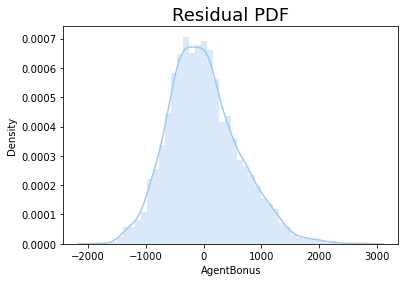

In [113]:
sns.distplot(y_train-y_hat)
plt.title('Residual PDF',size=18);

### Residual Plot is also centred at 0 and seems normal in distribution

### Prediction

In [114]:
col=X_train_model.columns
col

Index(['Age', 'CustTenure', 'MonthlyIncome', 'ExistingPolicyTenure',
       'SumAssured', 'Designation_Manager', 'MaritalStatus_Married',
       'PaymentMethod_Monthly'],
      dtype='object')

In [115]:
X_test_model=X_test[col]

In [116]:
X_test_model.shape

(904, 8)

In [117]:
# predictions
y_pred_test=reg.predict(X_test_model)

In [118]:
reg.score(X_test_model,y_test)

0.7952080719613281

In [119]:
# Getting Coefficient of linear Regression
Linear_coeffiecient=pd.DataFrame(reg.coef_,columns=['Feature Coefficients'],index=X_train_model.columns)
Linear_coeffiecient.sort_values(by='Feature Coefficients',ascending=False)

Feature Coefficients
SumAssured                       819.348074
MonthlyIncome                    255.850946
CustTenure                       201.410680
Age                              197.436987
ExistingPolicyTenure             109.868452
PaymentMethod_Monthly             25.224131
MaritalStatus_Married            -23.710258
Designation_Manager              -48.174839

#### calcualte mean absolute percentage error : best if it is less than 10

In [120]:
def mape(y_test, pred):
    y_test, pred = np.array(y_test), np.array(pred)
    mape = np.mean(np.abs((y_test - pred) / y_test))
    return mape

In [244]:
def metric_values(actual,pred):
    MAE = mean_absolute_error(actual,pred)
    MSE = mean_squared_error(actual,pred)
    RMSE = np.sqrt(mean_squared_error(actual,pred))
    R2_score= r2_score(actual,pred)
    MAPE= mean_absolute_percentage_error(actual,pred)
    return print( 'MAE:',MAE,'\n','MSE:',MSE,'\n','RMSE:',RMSE,'\n','R2_score:',R2_score,'\n','MAPE',MAPE)

## Model Evaluation

In [121]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,mean_absolute_percentage_error

## LINEAR REGRESSION

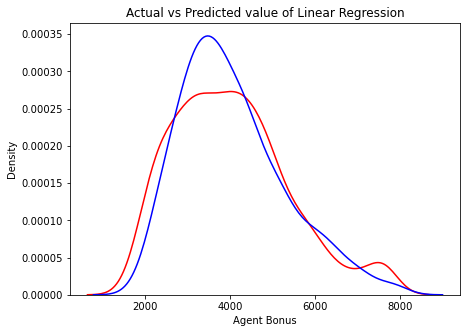

In [122]:
# Distribution of Actual & Predicted value
plt.figure(figsize=(7,5))
ax1=sns.distplot(y_test,hist=False,color='r',label='Actual Value')
sns.distplot(y_pred_test,hist=False,color='b',label='Predicted Value')
plt.title('Actual vs Predicted value of Linear Regression')
plt.xlabel('Agent Bonus')
plt.show()

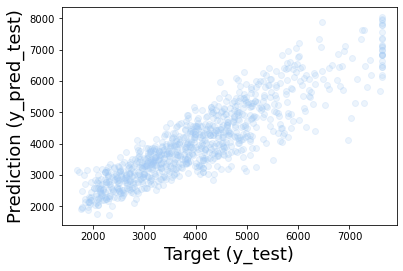

In [123]:
plt.scatter(y_test,y_pred_test,alpha=0.2)
plt.xlabel('Target (y_test)',size=18)
plt.ylabel('Prediction (y_pred_test)',size=18);

In [245]:
metric_values(y_test,y_pred_test)

MAE: 484.6212859048126 
 MSE: 378826.8308739244 
 RMSE: 615.489098907466 
 R2_score: 0.7952080719613281 
 MAPE 0.1270128101395905


In [246]:
print('Accuracy of Training:',reg.score(X_train_model,y_train))
print('Accuracy of Testing:',reg.score(X_test_model,y_test))

Accuracy of Training: 0.7957261272804073
Accuracy of Testing: 0.7952080719613281


# Lasso Regression

In [216]:
from sklearn.linear_model import Lasso

In [217]:
Lasso=Lasso(alpha=0.1,normalize=True)
Lasso.fit(X_train_model,y_train)

Lasso(alpha=0.1, normalize=True)

In [218]:
Lasso.score(X_train_model,y_train)

0.7956171783122952

In [219]:
y_lasso_predict=Lasso.predict(X_test_model)

In [247]:
metric_values(y_test,y_lasso_predict)

MAE: 484.3686727023364 
 MSE: 377540.29646584275 
 RMSE: 614.4430782959824 
 R2_score: 0.7959035661566873 
 MAPE 0.12718224608041878


In [248]:
print('Accuracy of Training:',Lasso.score(X_train_model,y_train))
print('Accuracy of Testing:',Lasso.score(X_test_model,y_test))

Accuracy of Training: 0.7956171783122952
Accuracy of Testing: 0.7959035661566873


## Polynomial Regression

In [125]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg=PolynomialFeatures(degree=2)
poly_reg

PolynomialFeatures()

In [126]:
# Transforming Feature to Higher degree
x_train_poly=poly_reg.fit_transform(X_train_model)
#split data
xp_train,xp_test,yp_train,yp_test=train_test_split(x_train_poly,y_train,test_size=0.30)

In [127]:
#Model training
plr=LinearRegression()
plr.fit(xp_train,yp_train)
plr.score(xp_train,yp_train)

0.8201607020092376

In [128]:
#Model prediction
y_poly_pred=plr.predict(xp_test)

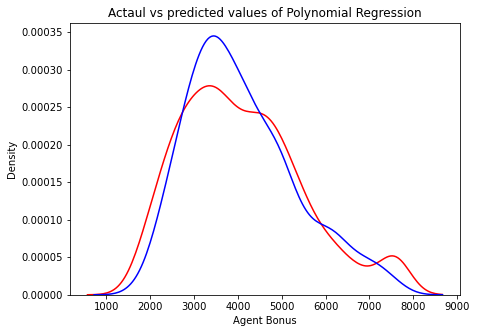

In [129]:
# Model Evaluation Polynomial
# Distribution of Actual & Predicted value
plt.figure(figsize=(7,5))
ax2=sns.distplot(yp_test,hist=False,color='r',label='Actual Value')
sns.distplot(y_poly_pred,hist=False,color='b',label='Predicted Value')
plt.xlabel('Agent Bonus')
plt.title('Actaul vs predicted values of Polynomial Regression');

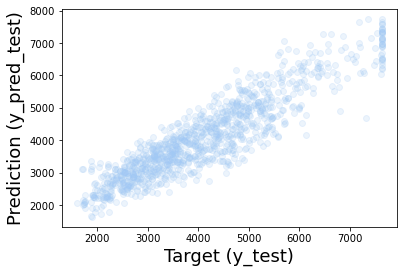

In [130]:
plt.scatter(yp_test,y_poly_pred,alpha=0.2)
plt.xlabel('Target (y_test)',size=18)
plt.ylabel('Prediction (y_pred_test)',size=18);

In [249]:
metric_values(yp_test,y_poly_pred)

MAE: 450.0546586981567 
 MSE: 324058.37795112014 
 RMSE: 569.2612563235971 
 R2_score: 0.8338851286622145 
 MAPE 0.11814492871772571


In [250]:
print('Accuracy of Training:',plr.score(xp_train,yp_train))
print('Accuracy of Testing:',plr.score(xp_test,yp_test))

Accuracy of Training: 0.8201607020092376
Accuracy of Testing: 0.8338851286622145


## Decision Tree Regressor

In [132]:
from sklearn.tree import DecisionTreeRegressor

In [133]:
from sklearn.experimental import enable_halving_search_cv

In [134]:
tree=DecisionTreeRegressor(random_state=1)

In [135]:
search_space={"splitter":["best","random"],
             'min_samples_split':[2,5,8,10],
             'min_samples_leaf':[3,4,5,8,10],
             'max_depth':[2,5,10,20],
             "max_features":["auto","log2","sqrt",None],
             "max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90]}

In [136]:
from sklearn.model_selection import GridSearchCV,HalvingGridSearchCV
GS=GridSearchCV(estimator=tree,
               param_grid=search_space,
               cv=3,
               verbose=2,
               n_jobs=1)

In [137]:
GS.fit(X_train_model,y_train)

Fitting 3 folds for each of 6400 candidates, totalling 19200 fits
[CV] END max_depth=2, max_features=auto, max_leaf_nodes=None, min_samples_leaf=3, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END max_depth=2, max_features=auto, max_leaf_nodes=None, min_samples_leaf=3, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END max_depth=2, max_features=auto, max_leaf_nodes=None, min_samples_leaf=3, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END max_depth=2, max_features=auto, max_leaf_nodes=None, min_samples_leaf=3, min_samples_split=2, splitter=random; total time=   0.0s
[CV] END max_depth=2, max_features=auto, max_leaf_nodes=None, min_samples_leaf=3, min_samples_split=2, splitter=random; total time=   0.0s
[CV] END max_depth=2, max_features=auto, max_leaf_nodes=None, min_samples_leaf=3, min_samples_split=2, splitter=random; total time=   0.0s
[CV] END max_depth=2, max_features=auto, max_leaf_nodes=None, min_samples_leaf=3, min_samples_split=5, spl

GridSearchCV(cv=3, estimator=DecisionTreeRegressor(random_state=1), n_jobs=1,
             param_grid={'max_depth': [2, 5, 10, 20],
                         'max_features': ['auto', 'log2', 'sqrt', None],
                         'max_leaf_nodes': [None, 10, 20, 30, 40, 50, 60, 70,
                                            80, 90],
                         'min_samples_leaf': [3, 4, 5, 8, 10],
                         'min_samples_split': [2, 5, 8, 10],
                         'splitter': ['best', 'random']},
             verbose=2)

In [138]:
GS.best_params_

{'max_depth': 20,
 'max_features': 'auto',
 'max_leaf_nodes': 70,
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'splitter': 'best'}

In [139]:
GS.best_score_

0.8129561080785009

In [140]:
dtree=DecisionTreeRegressor(criterion='squared_error',max_depth=20,max_features='auto',max_leaf_nodes=70,min_samples_leaf=3,min_samples_split=2,splitter='best')
# Training model
dtree.fit(X_train_model,y_train)
# Adjusted score
dtree.score(X_train_model,y_train)

0.8577346990428432

In [141]:
Feature_Importance=round((pd.DataFrame(dtree.feature_importances_,columns=['Imp'],index=X_train_model.columns)),3)
Feature_Importance

Imp
Age                    0.069
CustTenure             0.051
MonthlyIncome          0.054
ExistingPolicyTenure   0.004
SumAssured             0.822
Designation_Manager    0.000
MaritalStatus_Married  0.000
PaymentMethod_Monthly  0.000

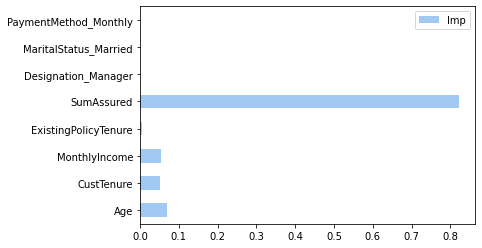

In [142]:
Feature_Importance.plot(kind='barh');

In [143]:
# Prediction
y_des_pred=dtree.predict(X_test_model)

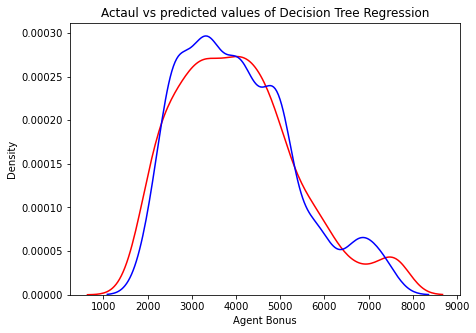

In [144]:
# Evaluation
# Model Evaluation Decision Tree Regressor
# Distribution of Actual & Predicted value
plt.figure(figsize=(7,5))
ax3=sns.distplot(y_test,hist=False,color='r',label='Actual Value')
sns.distplot(y_des_pred,hist=False,color='b',label='Predicted Value')
plt.xlabel('Agent Bonus')
plt.title('Actaul vs predicted values of Decision Tree Regression');

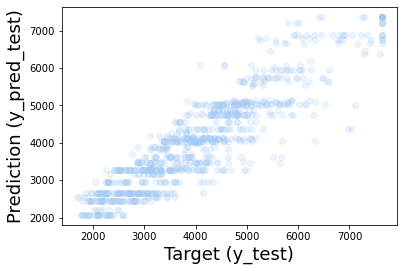

In [145]:
plt.scatter(y_test,y_des_pred,alpha=0.2)
plt.xlabel('Target (y_test)',size=18)
plt.ylabel('Prediction (y_pred_test)',size=18);

In [251]:
metric_values(y_test,y_des_pred)

MAE: 442.61637624054634 
 MSE: 328279.49808491516 
 RMSE: 572.9568029833621 
 R2_score: 0.8225337123210488 
 MAPE 0.11681524435873276


In [252]:
print('Accuracy Training Model:', dtree.score(X_train_model,y_train))
print('Accuracy Testing Model:', dtree.score(X_test_model,y_test))

Accuracy Training Model: 0.8577346990428432
Accuracy Testing Model: 0.8225337123210488


## Random Forest Regressor


In [147]:
from sklearn.ensemble import RandomForestRegressor
rand_f=RandomForestRegressor()

In [148]:
random=RandomForestRegressor()

In [149]:
parameters = {
 'n_estimators': [50,100,200,250],
 'max_depth': [None, 5, 10],
 'min_samples_split': [2, 3, 4, 5, 7, 10],
 'min_samples_leaf': [1, 2, 3, 4, 5],
 'max_features': ['auto', 'sqrt']}


In [150]:
grid_search=HalvingGridSearchCV(estimator=random,
                        param_grid=parameters,
                        cv=3,
                        scoring='neg_mean_absolute_percentage_error',
                        n_jobs=-1)

In [151]:
grid_search.fit(X_train_model,y_train)

HalvingGridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
                    param_grid={'max_depth': [None, 5, 10],
                                'max_features': ['auto', 'sqrt'],
                                'min_samples_leaf': [1, 2, 3, 4, 5],
                                'min_samples_split': [2, 3, 4, 5, 7, 10],
                                'n_estimators': [50, 100, 200, 250]},
                    scoring='neg_mean_absolute_percentage_error')

In [152]:
grid_search.best_params_

{'max_depth': None,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'n_estimators': 250}

In [153]:
grid_search.best_estimator_

RandomForestRegressor(min_samples_split=3, n_estimators=250)

In [181]:
from sklearn.model_selection import cross_val_score
cv_scores=cross_val_score(estimator=rand_f,X= X_train_model,y=y_train,cv=3)
cv_scores.mean()

0.8448693582344146

In [154]:
rand_f=RandomForestRegressor(max_depth= None,max_features='sqrt',min_samples_leaf= 1,min_samples_split=3,n_estimators=250)
# TRAINING
rand_f.fit(X_train_model,y_train)
# SCore Training model
rand_f.score(X_train_model,y_train)

0.9710106210958876

In [155]:
# Prediction
y_rand_pred=rand_f.predict(X_test_model)

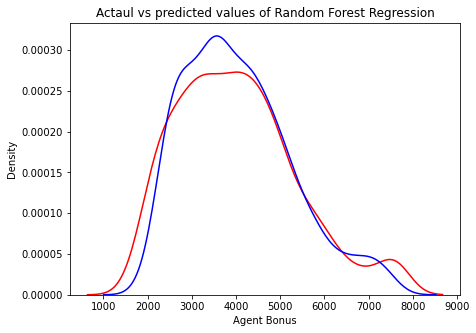

In [156]:
# Evaluation model
# Model Evaluation Random Forest Regressor
# Distribution of Actual & Predicted value
plt.figure(figsize=(7,5))
ax4=sns.distplot(y_test,hist=False,color='r',label='Actual Value')
sns.distplot(y_rand_pred,hist=False,color='b',label='Predicted Value')
plt.xlabel('Agent Bonus')
plt.title('Actaul vs predicted values of Random Forest Regression');

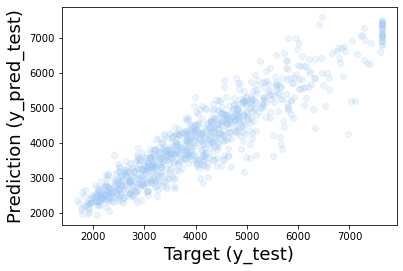

In [157]:
plt.scatter(y_test,y_rand_pred,alpha=0.2)
plt.xlabel('Target (y_test)',size=18)
plt.ylabel('Prediction (y_pred_test)',size=18);

In [158]:
Rand_Feature_Importance=round((pd.DataFrame(rand_f.feature_importances_,columns=['Imp'],index=X_train_model.columns)),3)
Rand_Feature_Importance

Imp
Age                    0.173
CustTenure             0.169
MonthlyIncome          0.156
ExistingPolicyTenure   0.052
SumAssured             0.432
Designation_Manager    0.009
MaritalStatus_Married  0.006
PaymentMethod_Monthly  0.003

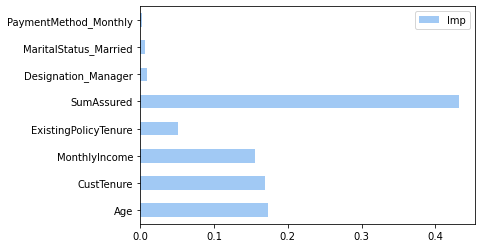

In [159]:
Rand_Feature_Importance.plot(kind='barh');

In [256]:
metric_values(y_test,y_rand_pred)

MAE: 392.54272599796957 
 MSE: 257185.20785239828 
 RMSE: 507.13430948063285 
 R2_score: 0.8609669371685875 
 MAPE 0.10471721782351326


In [254]:
print('Accuracy Training Model:', rand_f.score(X_train_model,y_train))
print('Accuracy Testing Model:', rand_f.score(X_test_model,y_test))

Accuracy Training Model: 0.9710106210958876
Accuracy Testing Model: 0.8609669371685875


In [161]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [162]:
from xgboost import XGBRegressor

In [163]:
xgboost_reg=XGBRegressor(n_estimators=100)

In [164]:
# Train model from XGBoost
xgboost_reg.fit(X_train_model,y_train)
# Score
xgboost_reg.score(X_train_model,y_train)

0.9683968847856909

In [165]:
# Prediction on test model
y_xgboost_pred=xgboost_reg.predict(X_test_model)

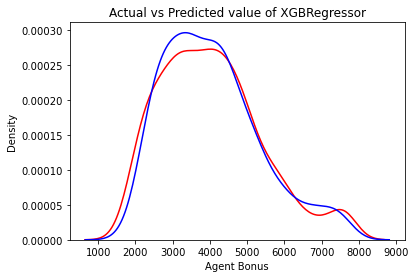

In [166]:
# Evaluation model
# Model Evaluation XGBoostRegressor
# Distribution of Actual & Predicted value
ax5=sns.distplot(y_test,hist=False,color='r',label='Actual value')
sns.distplot(y_xgboost_pred,hist=False,color='b',label='Predicted Value')
plt.xlabel('Agent Bonus')
plt.title('Actual vs Predicted value of XGBRegressor')
plt.show()

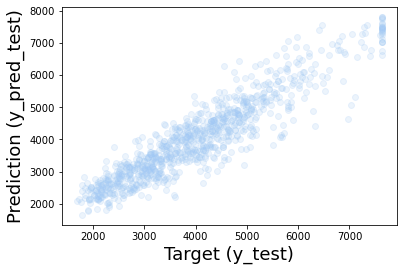

In [167]:
plt.scatter(y_test,y_xgboost_pred,alpha=0.2)
plt.xlabel('Target (y_test)',size=18)
plt.ylabel('Prediction (y_pred_test)',size=18);

In [257]:
metric_values(y_test,y_xgboost_pred)

MAE: 397.30102525559147 
 MSE: 268854.7531235035 
 RMSE: 518.5120568738046 
 R2_score: 0.8546584381905952 
 MAPE 0.10631407252777986


In [258]:
print('Accuarcy of Train Model:',xgboost_reg.score(X_train_model,y_train))
print('Accuarcy of Test Model:',xgboost_reg.score(X_test_model,y_test))

Accuarcy of Train Model: 0.9683968847856909
Accuarcy of Test Model: 0.8546584381905952


In [187]:
# Lets Compare from Residual of train model

y_res_linear=reg.predict(X_train_model)
y_res_lasso=Lasso.predict(X_train_model)
y_res_poly=plr.predict(xp_train)
y_res_tree=dtree.predict(X_train_model)
y_res_rand=rand_f.predict(X_train_model)
y_res_xgboost=xgboost_reg.predict(X_train_model)

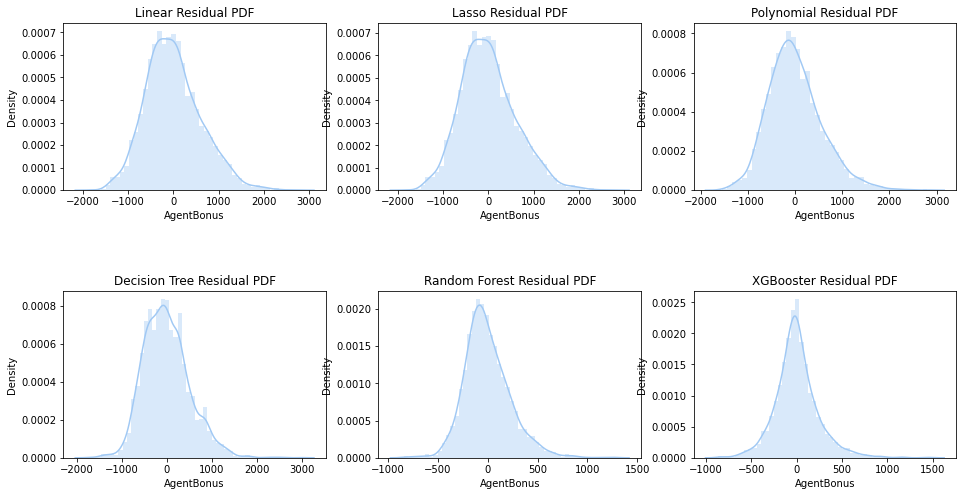

In [211]:
# Residual Plot
fig=plt.figure(figsize=(16,8))
plt.subplots_adjust(hspace = 0.6)
sns.set_palette('pastel')

plt.subplot(231)
ax1=sns.distplot(y_train-y_res_linear)
plt.title('Linear Residual PDF')

plt.subplot(232)
ax2=sns.distplot(y_train-y_res_lasso)
plt.title('Lasso Residual PDF')

plt.subplot(233)
ax3=sns.distplot(yp_train-y_res_poly)
plt.title('Polynomial Residual PDF')

plt.subplot(234)
ax4=sns.distplot(y_train-y_res_tree)
plt.title('Decision Tree Residual PDF')

plt.subplot(235)
ax5=sns.distplot(y_train-y_res_rand)
plt.title('Random Forest Residual PDF')

plt.subplot(236)
ax6=sns.distplot(y_train-y_res_xgboost)
plt.title('XGBooster Residual PDF')

plt.show()

In [222]:
## Checking Performer deeper with random Forest
data={
    'Real Agent Bonus': y_test,
    'Predicted Agent Bonus':y_rand_pred,
    'Delta':np.abs(y_test-y_rand_pred)
}

df=pd.DataFrame(data)
df.sort_values(by='Real Agent Bonus',ascending=False)

Real Agent Bonus  Predicted Agent Bonus       Delta
2846            7626.5            7454.442833  172.057167
96              7626.5            7361.149767  265.350233
2980            7626.5            6825.048033  801.451967
3651            7626.5            7311.269300  315.230700
2333            7626.5            7405.517995  220.982005
...                ...                    ...         ...
2216            1784.0            2579.090600  795.090600
314             1777.0            1970.687581  193.687581
166             1770.0            2077.928800  307.928800
415             1714.0            2288.178267  574.178267
1743            1688.0            2377.632181  689.632181

[904 rows x 3 columns]

### Checking regression model important feature and will see in R2 score & RMSE increase or not.

In [225]:
# Lets Try with most important feature and check random forest score
new_list=['SumAssured','ExistingPolicyTenure','MonthlyIncome','CustTenure','Age']

In [229]:
X1=scaled_data[new_list]
Y=scaled_data['AgentBonus']

In [230]:
X_Train,X_Test,Y_Train,Y_Test=train_test_split(X1,Y,test_size=0.20,random_state=42)

#### Random Forest with Important Features

In [231]:
reg_random=RandomForestRegressor()
reg_random.fit(X_Train,Y_Train)

RandomForestRegressor()

In [232]:
y_reg_random_pred=reg_random.predict(X_Test)

In [259]:
metric_values(Y_Test,y_reg_random_pred)

MAE: 376.0191305309734 
 MSE: 253306.26886279215 
 RMSE: 503.29540914138306 
 R2_score: 0.8630638725746496 
 MAPE 0.09969636687720215


In [260]:
print('Accuarcy of Train Model:',reg_random.score(X_Train,Y_Train))
print('Accuarcy of Test Model:',reg_random.score(X_Test,Y_Test))

Accuarcy of Train Model: 0.9801984483037888
Accuarcy of Test Model: 0.8630638725746496


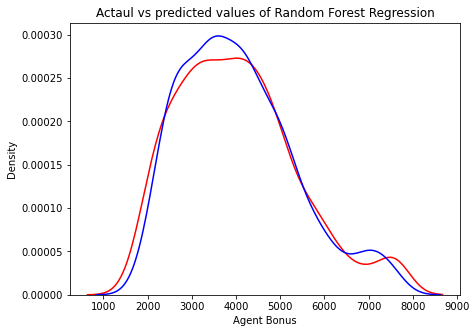

In [236]:
plt.figure(figsize=(7,5))
ax4=sns.distplot(Y_Test,hist=False,color='r',label='Actual Value')
sns.distplot(y_reg_random_pred,hist=False,color='b',label='Predicted Value')
plt.xlabel('Agent Bonus')
plt.title('Actaul vs predicted values of Random Forest Regression');

### XG BOoster with IMportant Features

In [237]:
# XGB BOOSTer
XG=XGBRegressor(n_estimators=100)

In [238]:
XG.fit(X_Train,Y_Train)
y_XG_pred=XG.predict(X_Test)

In [262]:
metric_values(Y_Test,y_XG_pred)

MAE: 385.74932375207413 
 MSE: 253010.06885531347 
 RMSE: 503.00106247930876 
 R2_score: 0.863223996846937 
 MAPE 0.10279206726283471


In [261]:
print('Accuarcy of Train Model:',XG.score(X_Train,Y_Train))
print('Accuarcy of Test Model:',XG.score(X_Test,Y_Test))

Accuarcy of Train Model: 0.9692125826712454
Accuarcy of Test Model: 0.863223996846937


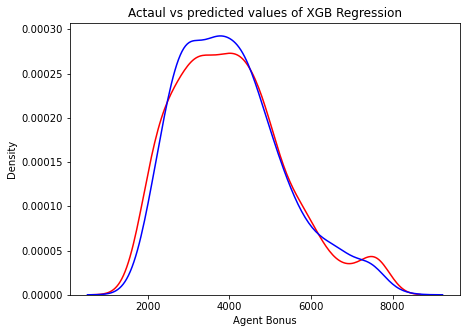

In [266]:
plt.figure(figsize=(7,5))
ax4=sns.distplot(Y_Test,hist=False,color='r',label='Actual Value')
sns.distplot(y_XG_pred,hist=False,color='b',label='Predicted Value')
plt.xlabel('Agent Bonus')
plt.title('Actaul vs predicted values of XGB Regression');

### Decision Tree with Important Features

In [263]:
# dtree
tree=DecisionTreeRegressor()
tree.fit(X_Train,Y_Train)
y_tree_pred=tree.predict(X_Test)

In [264]:
metric_values(Y_Test,y_tree_pred)

MAE: 493.4651548672566 
 MSE: 496780.22317477874 
 RMSE: 704.8263780355974 
 R2_score: 0.7314430462046573 
 MAPE 0.13100076715158554


In [265]:
print('Accuarcy of Train Model:',tree.score(X_Train,Y_Train))
print('Accuarcy of Test Model:',tree.score(X_Test,Y_Test))

Accuarcy of Train Model: 0.9999801378358114
Accuarcy of Test Model: 0.7314430462046573


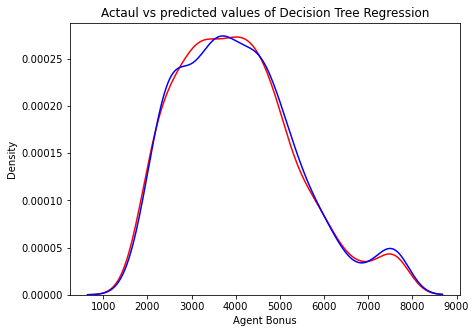

In [269]:
plt.figure(figsize=(7,5))
ax4=sns.distplot(Y_Test,hist=False,color='r',label='Actual Value')
sns.distplot(y_tree_pred,hist=False,color='b',label='Predicted Value')
plt.xlabel('Agent Bonus')
plt.title('Actaul vs predicted values of Decision Tree Regression');

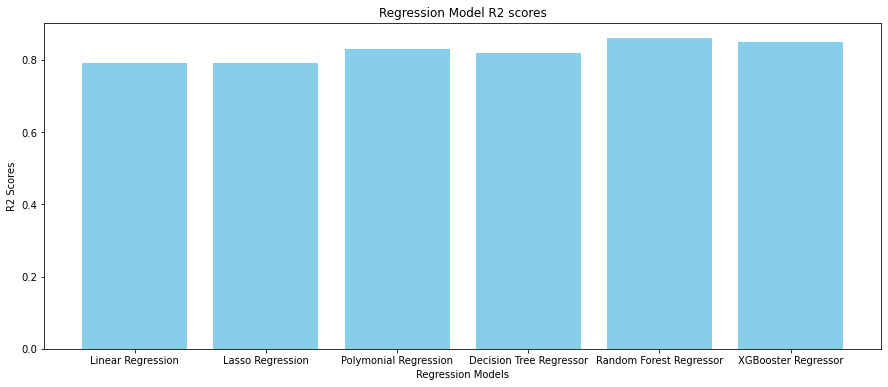

In [272]:
# Comparison of Different Model R2 Score with 9 features
model_names=['Linear Regression','Lasso Regression','Polymonial Regression','Decision Tree Regressor','Random Forest Regressor','XGBooster Regressor']
R2_scores=[0.79,0.79,0.83,0.82,0.86,0.85]

# set figure Size
plt.figure(figsize=(15,6))

# plt
plt.bar(model_names,R2_scores,color='skyblue')
plt.xlabel('Regression Models')
plt.ylabel('R2 Scores')
plt.title('Regression Model R2 scores');


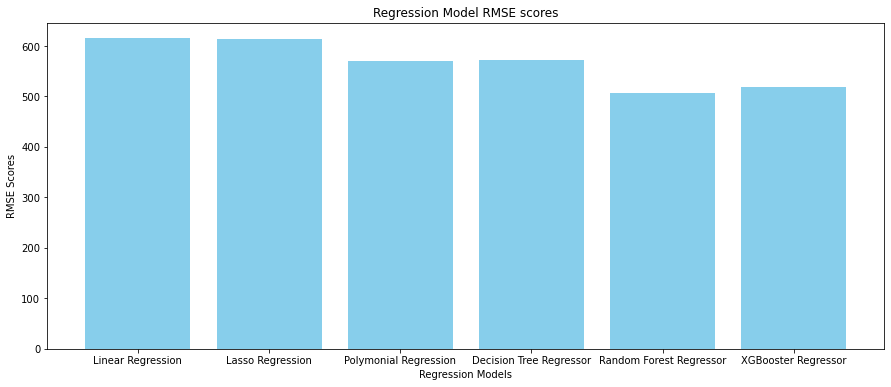

In [276]:
# Comparison of Different Model RMSE with 9 features
model_name=['Linear Regression','Lasso Regression','Polymonial Regression','Decision Tree Regressor','Random Forest Regressor','XGBooster Regressor']
RMSE=[615.48,614.44,569.76,572.95,507.13,518.51]

# set figure Size
plt.figure(figsize=(15,6))

# plt
plt.bar(model_name,RMSE,color='skyblue')
plt.xlabel('Regression Models')
plt.ylabel('RMSE Scores')
plt.title('Regression Model RMSE scores');